In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import nquad
%matplotlib inline

In [28]:
nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])

(7.866842992401425, 8.733950221275128e-14)

In [31]:
def printer(name):
    base=np.genfromtxt(name+"(base-level5).txt",delimiter=',')
    ee=np.genfromtxt(name+"(e-level5).txt",delimiter=',')
    #ee=ee[(ee[:,0]<=1)&(ee[:,1]<=1)]
    ef=np.genfromtxt(name+"(f-level5).txt",delimiter=',')
    eg=np.genfromtxt(name+"(g-level5).txt",delimiter=',')
    baserows=base.view([('',base.dtype)]*base.shape[1])
    eerows=ee.view([('',ee.dtype)]*ee.shape[1])
    efrows=ef.view([('',ef.dtype)]*ef.shape[1])
    egrows=eg.view([('',eg.dtype)]*eg.shape[1])
    eedif=np.setdiff1d(eerows,baserows).view(ee.dtype).reshape(-1,ee.shape[1])
    efdif=np.setdiff1d(efrows,baserows).view(ef.dtype).reshape(-1,ef.shape[1])
    egdif=np.setdiff1d(egrows,baserows).view(eg.dtype).reshape(-1,eg.shape[1])
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(eedif[:,0],eedif[:,1],".r")
    plt.title(name +" (e)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(efdif[:,0],efdif[:,1],".r")
    plt.title(name +" (f)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(egdif[:,0],egdif[:,1],".r")
    plt.title(name +" (g)")
    df=pd.read_csv(name+".txt",header=None)
    display(df)
    ye=nquad(lambda x,y: (x**3-y**2),[[-1,1],[-1,1]])
    ye2=nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[5]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[4]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[6]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Approximationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[8]-4),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[11]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[10]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[12]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Approximationsfehler Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-4),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler MonteCarlo")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=x³-y²")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[8]-4),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-4),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1+(sin(x)-cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[16]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[17]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[18]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[19]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[20]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[21]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[22]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[23]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[24]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[25]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[26]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[27]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[28]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[29]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[30]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[31]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[32]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[33]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,10.000000,20.000000,40.000000,80.000000,1.600000e+02,3.200000e+02,6.400000e+02,1.280000e+03,2.560000e+03,5.120000e+03,1.024000e+04,2.048000e+04,4.096000e+04,8.192000e+04,NaN
1,-1.500000,-1.500000,-1.375000,-1.345581,-1.336189e+00,-1.333949e+00,-1.333496e+00,-1.333374e+00,-1.333344e+00,-1.333336e+00,-1.333334e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,NaN
2,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,NaN
3,7.812900,7.812900,7.853104,7.863393,7.867000e+00,7.866895e+00,7.866864e+00,7.866849e+00,7.866844e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,NaN
4,0.007998,0.007949,0.000515,0.000018,1.492528e-06,9.973900e-08,6.280563e-09,4.363296e-10,2.879540e-11,1.746100e-12,1.117000e-13,7.000000e-15,4.000000e-16,0.000000e+00,NaN
5,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
6,0.001340,0.001348,0.000094,0.000012,1.276192e-06,1.648356e-07,1.571092e-08,1.700143e-09,1.680523e-10,1.627990e-11,1.500800e-12,1.386000e-13,1.260000e-14,1.100000e-15,NaN
7,-1.500000,-1.500000,-1.375000,-1.343750,-1.335938e+00,-1.333984e+00,-1.333496e+00,-1.333496e+00,-1.333374e+00,-1.333344e+00,-1.333336e+00,-1.333334e+00,-1.333333e+00,-1.333333e+00,NaN
8,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,NaN
9,7.812900,7.812900,7.853104,7.863393,7.865979e+00,7.866627e+00,7.866789e+00,7.866789e+00,7.866829e+00,7.866840e+00,7.866842e+00,7.866843e+00,7.866843e+00,7.866843e+00,NaN


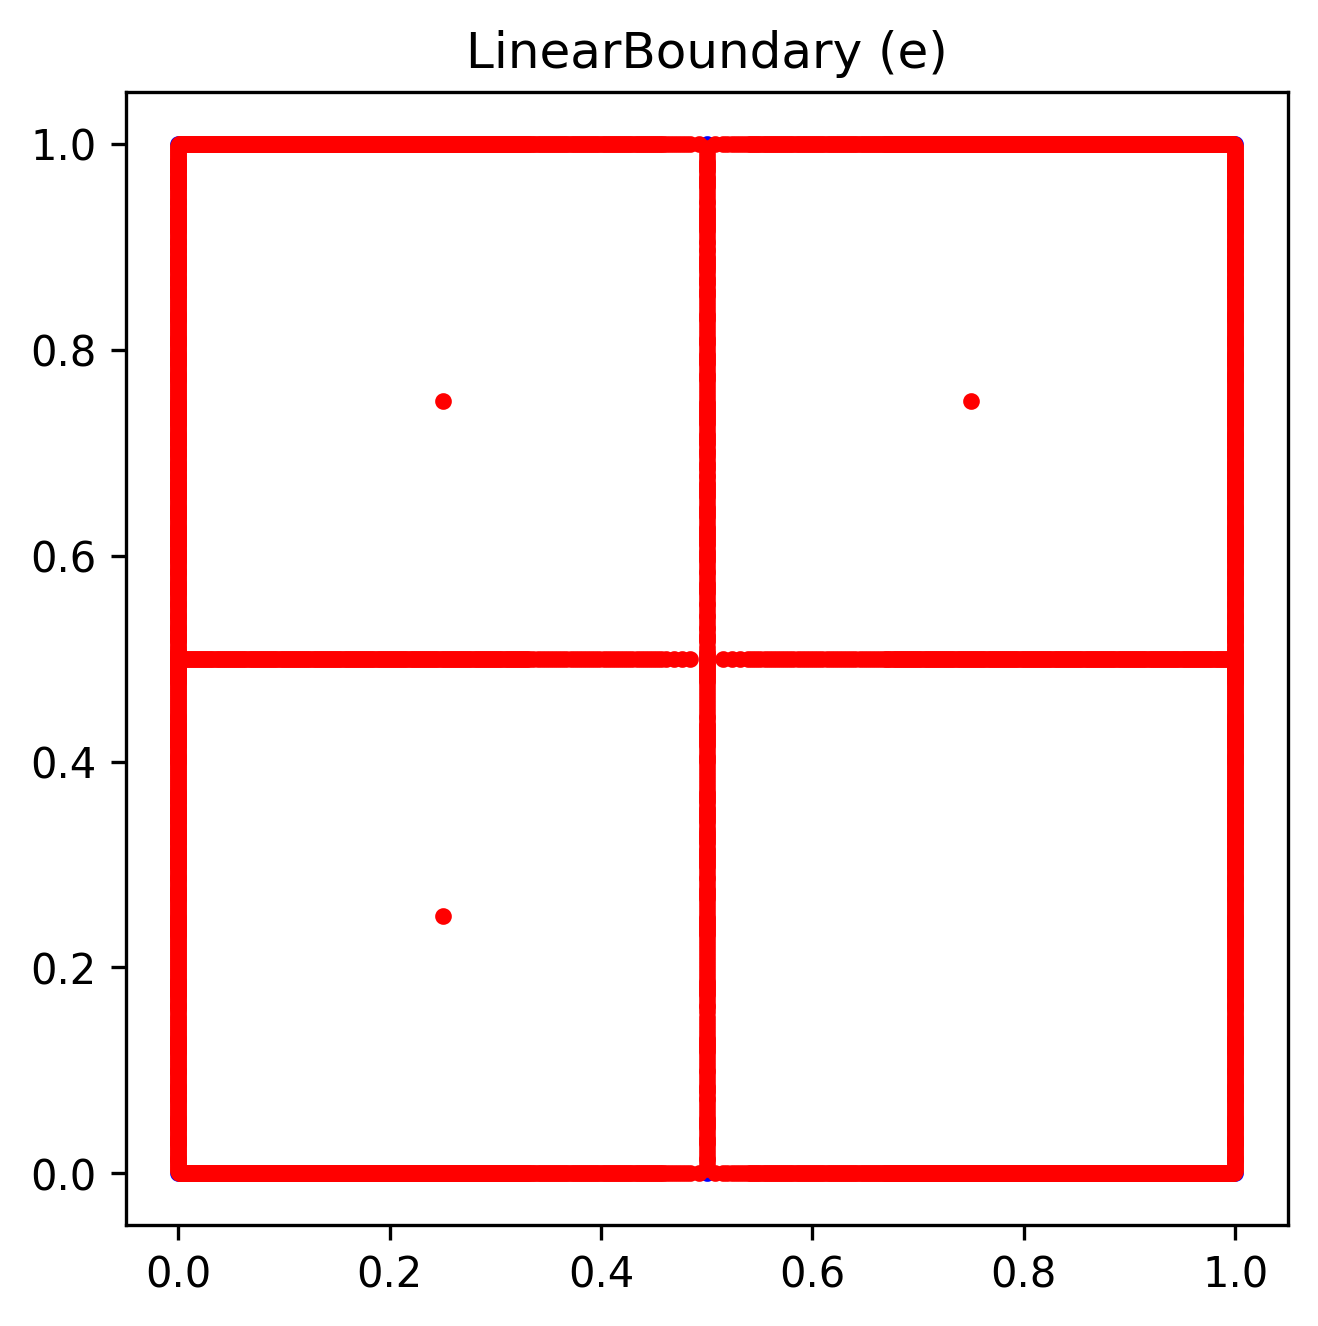

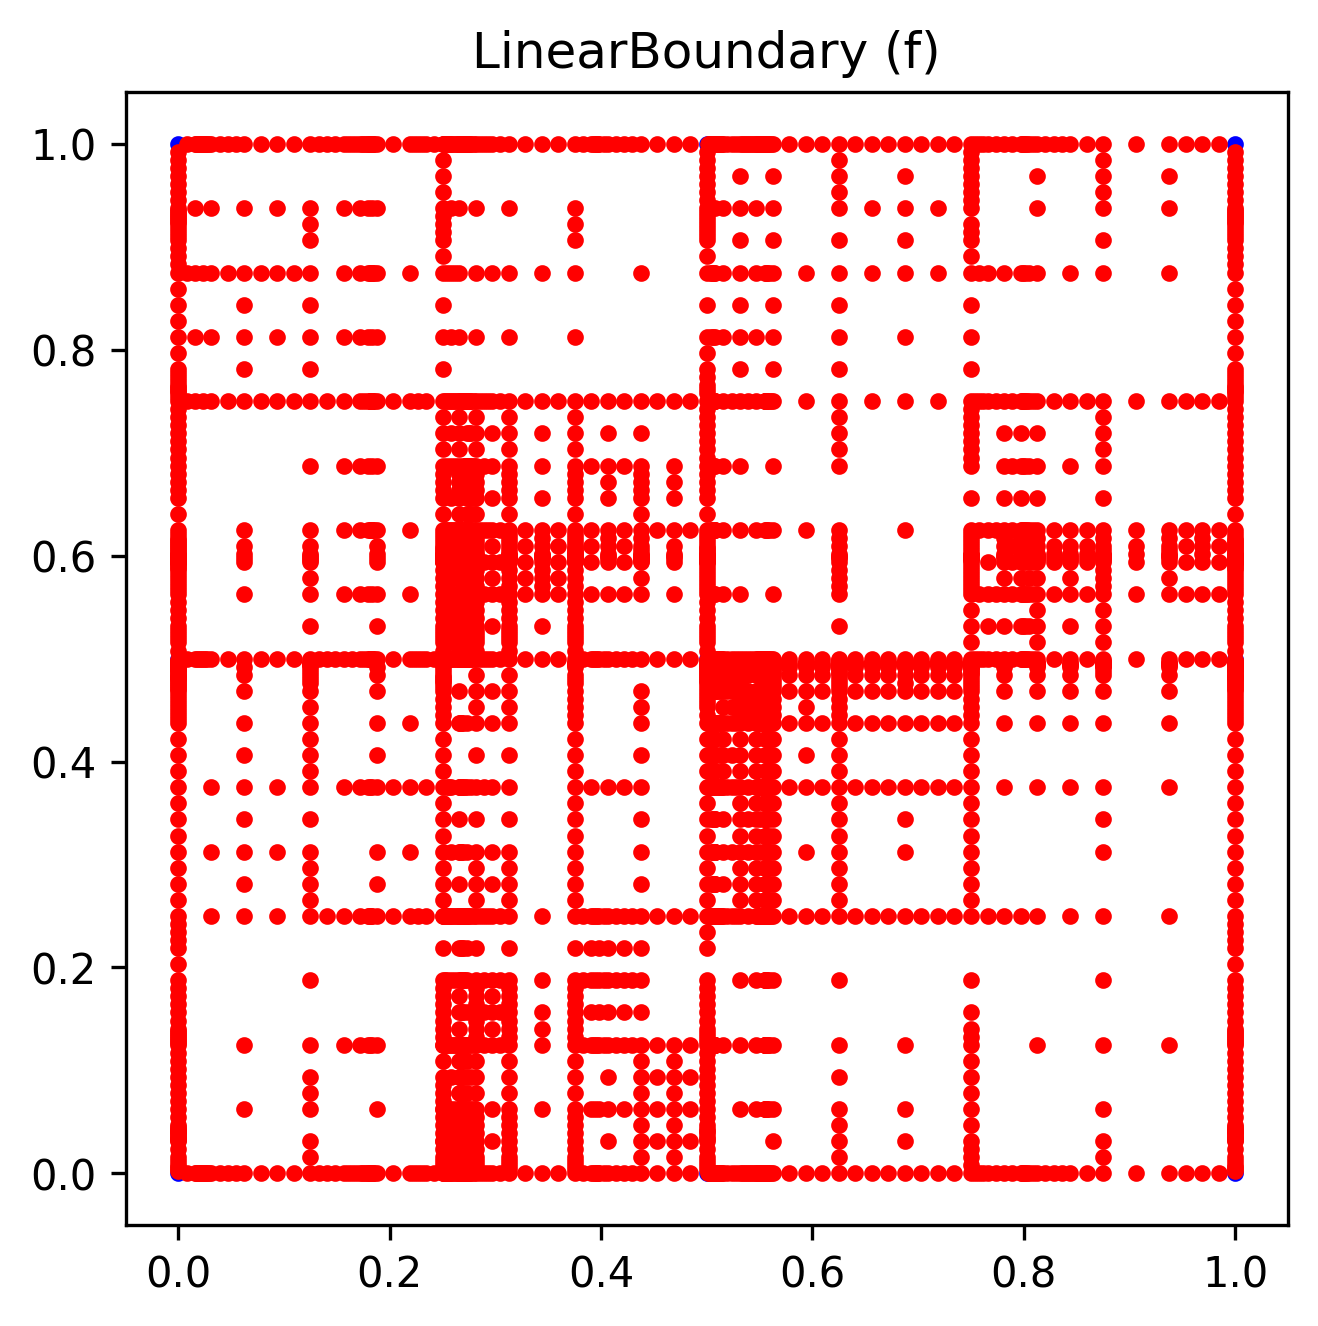

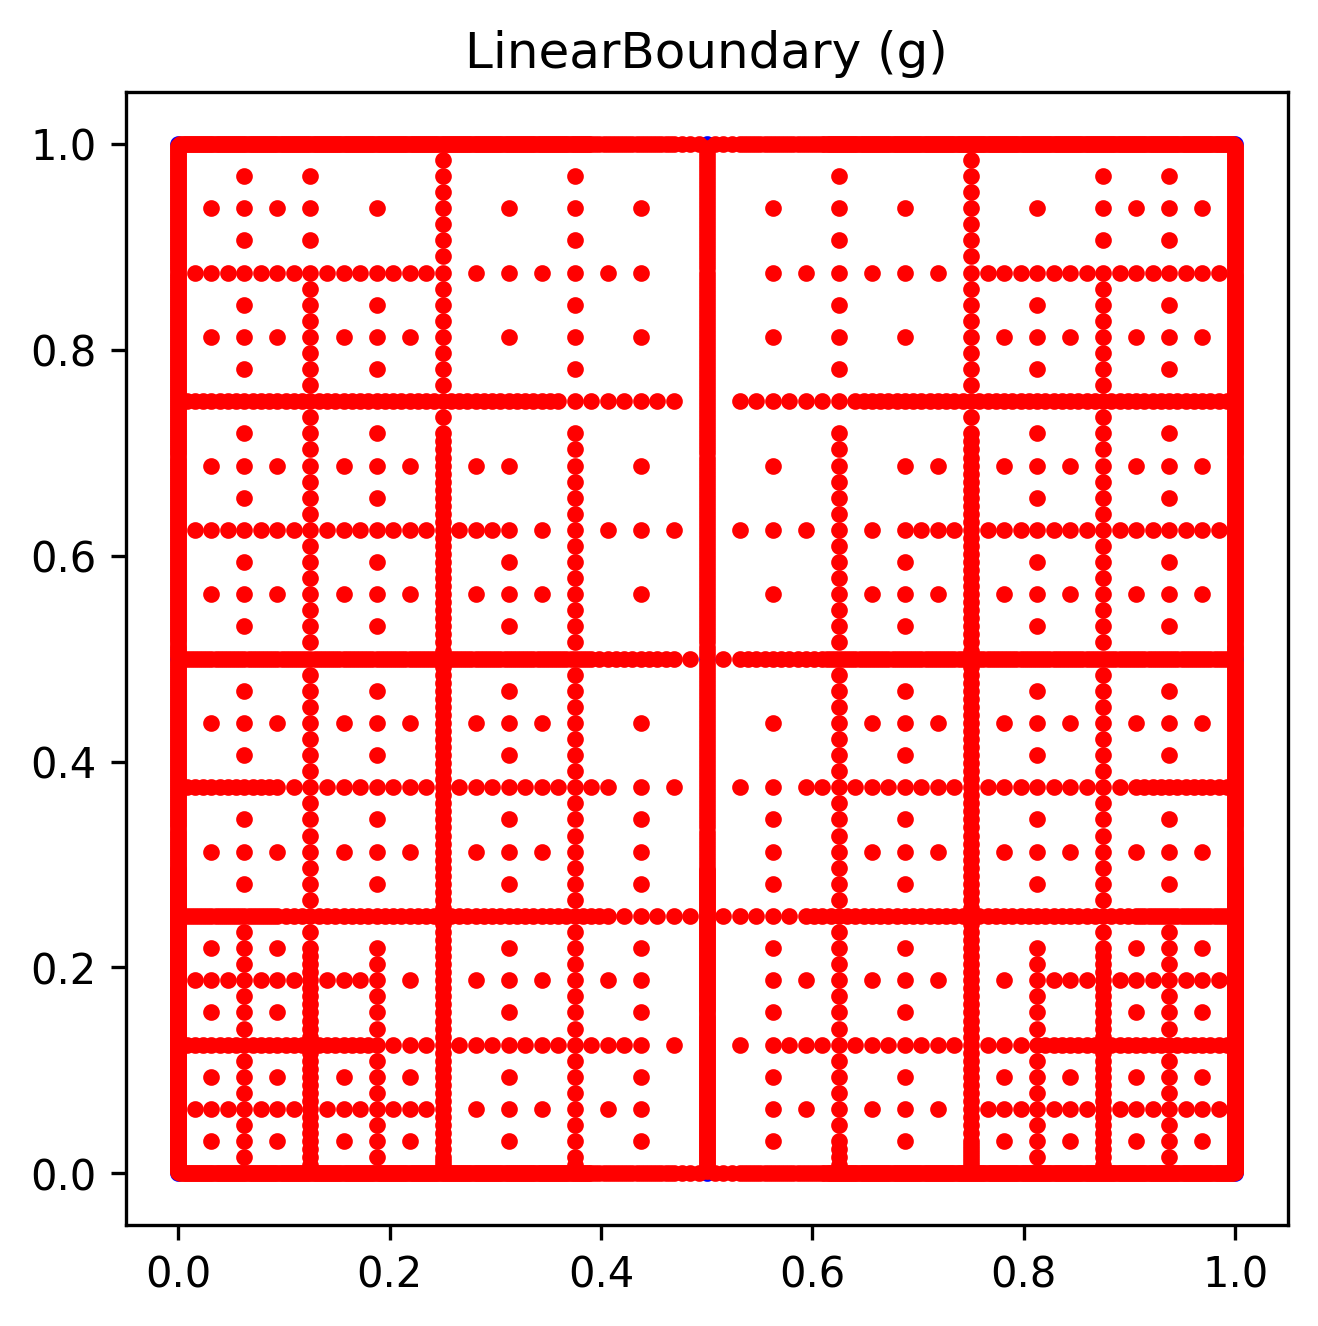

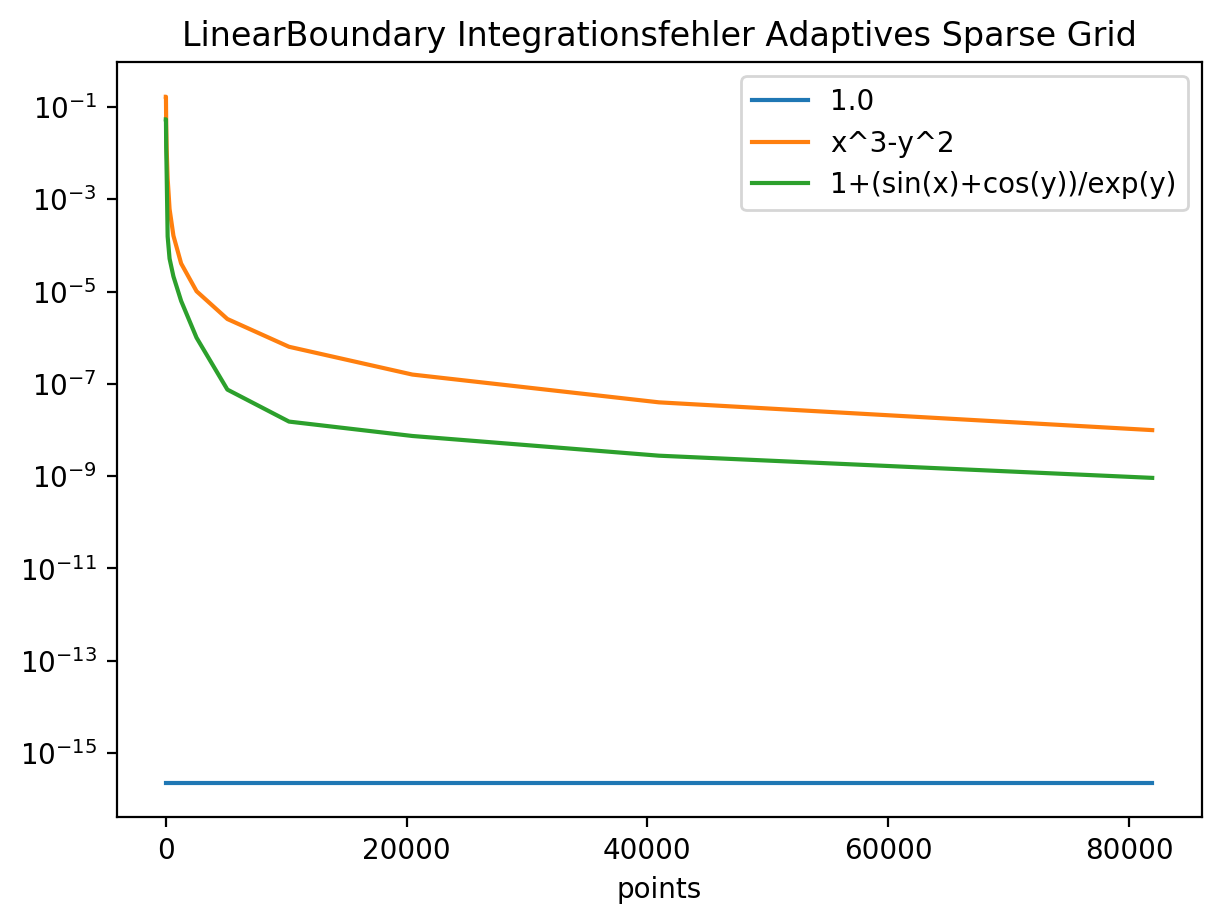

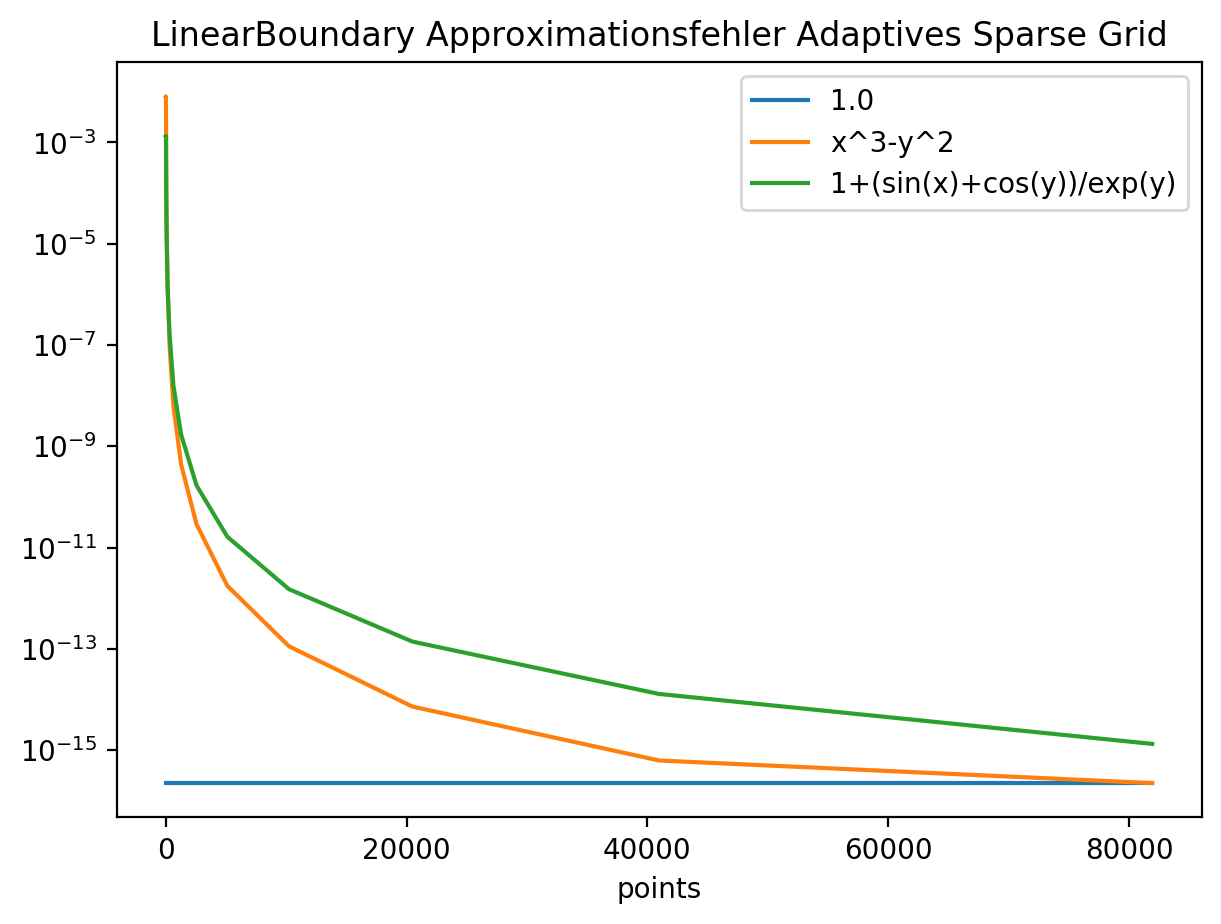

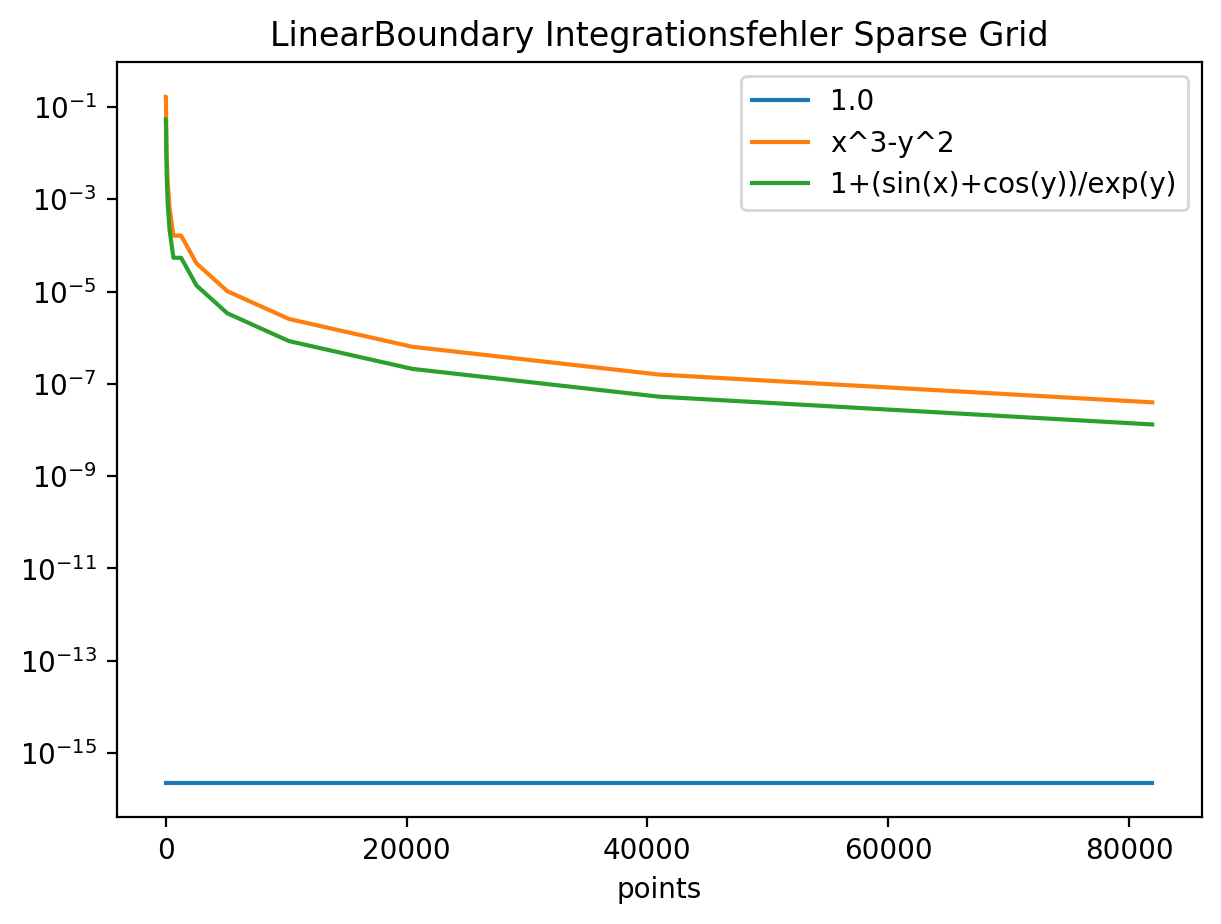

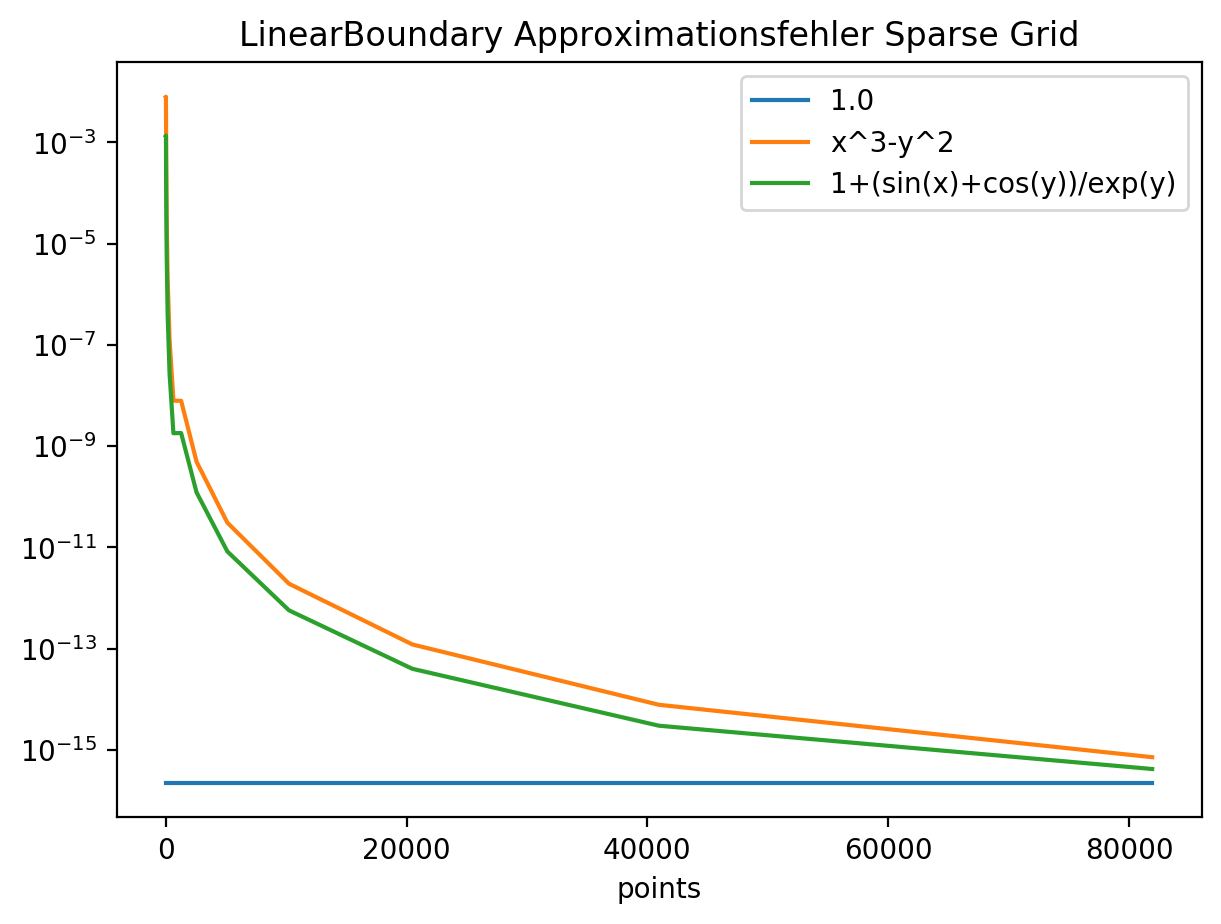

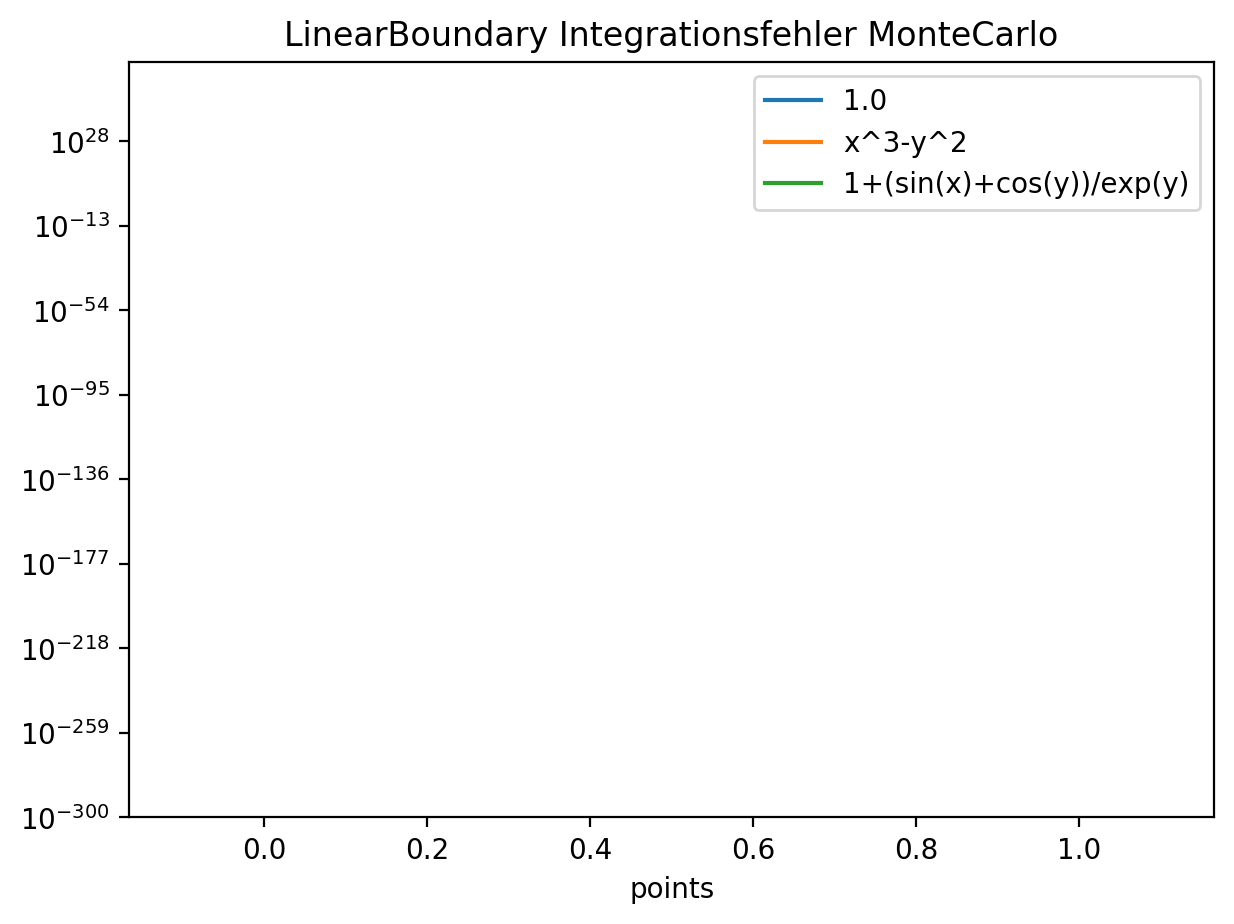

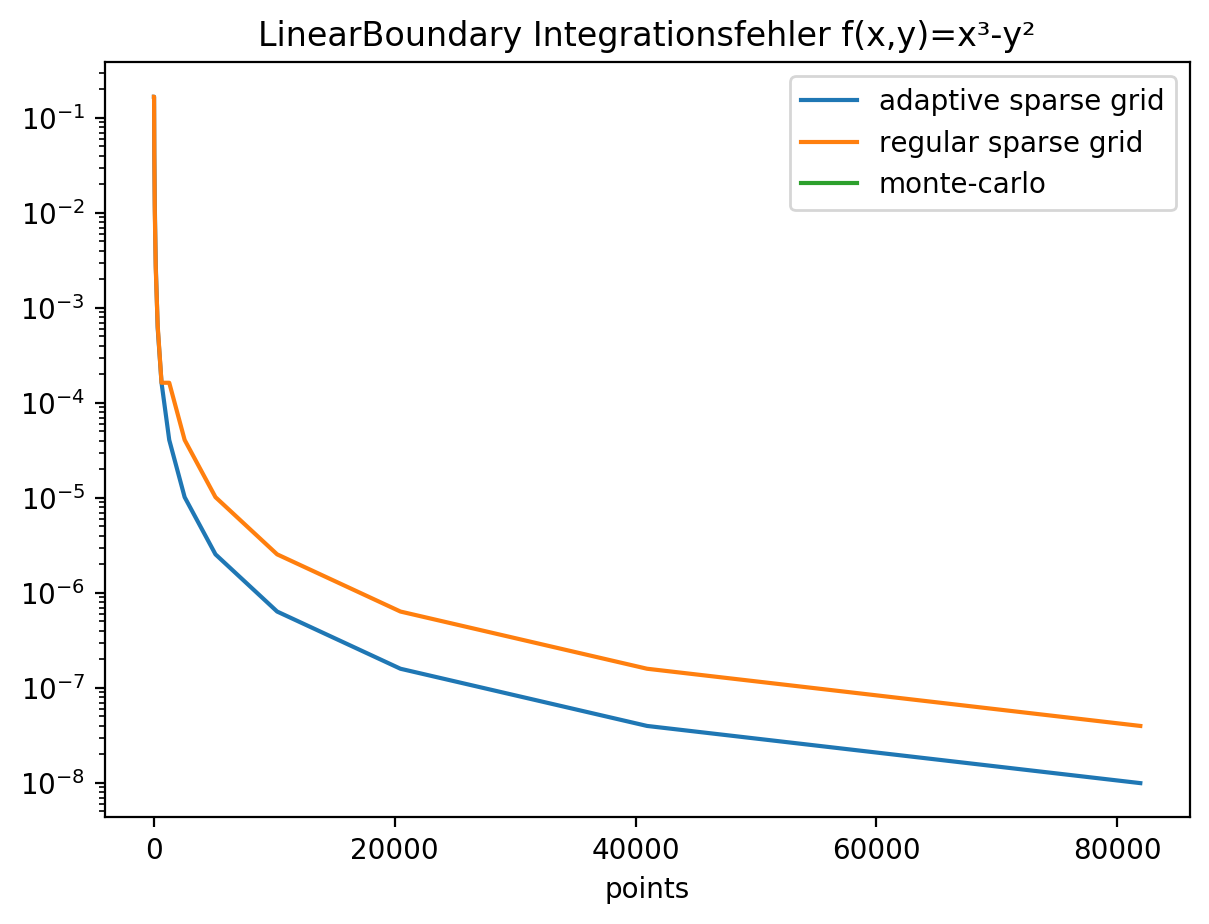

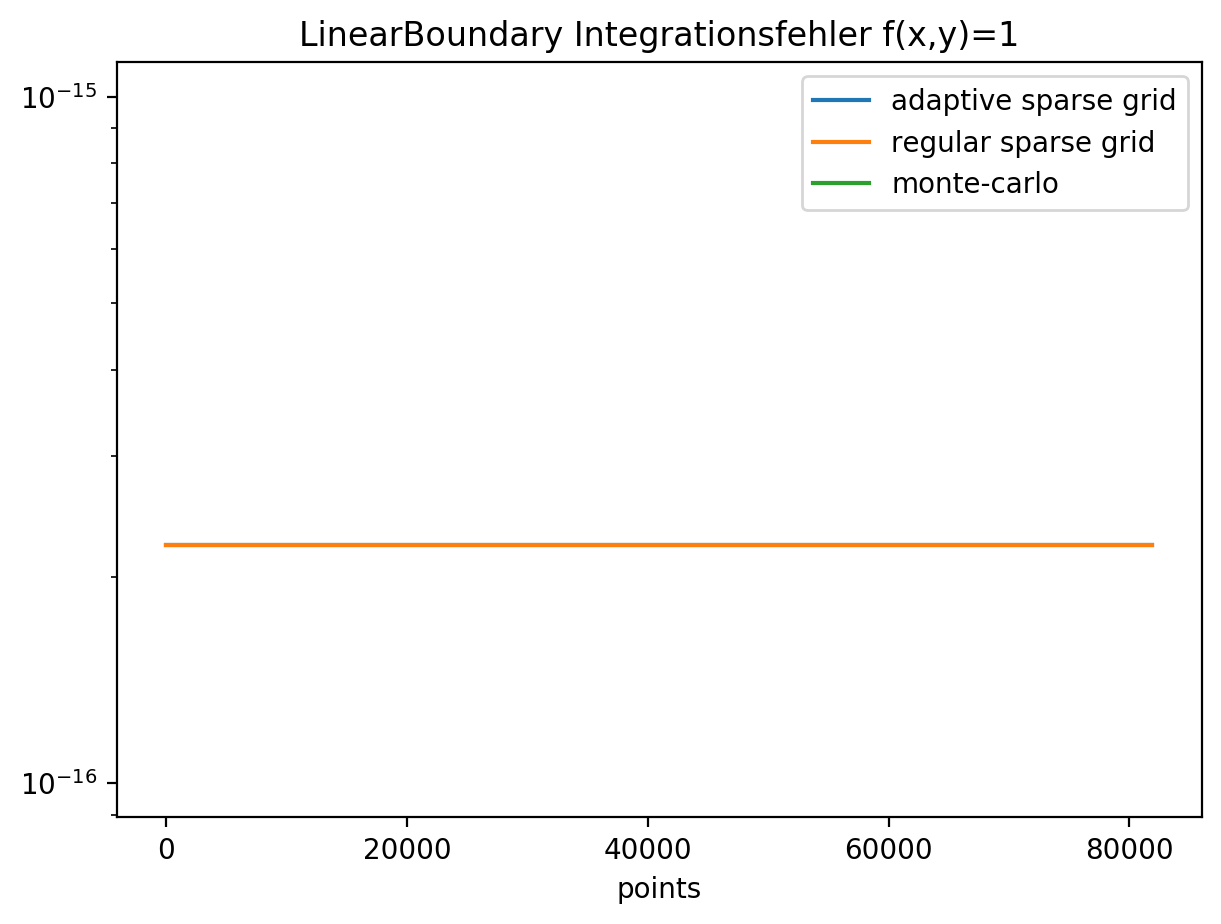

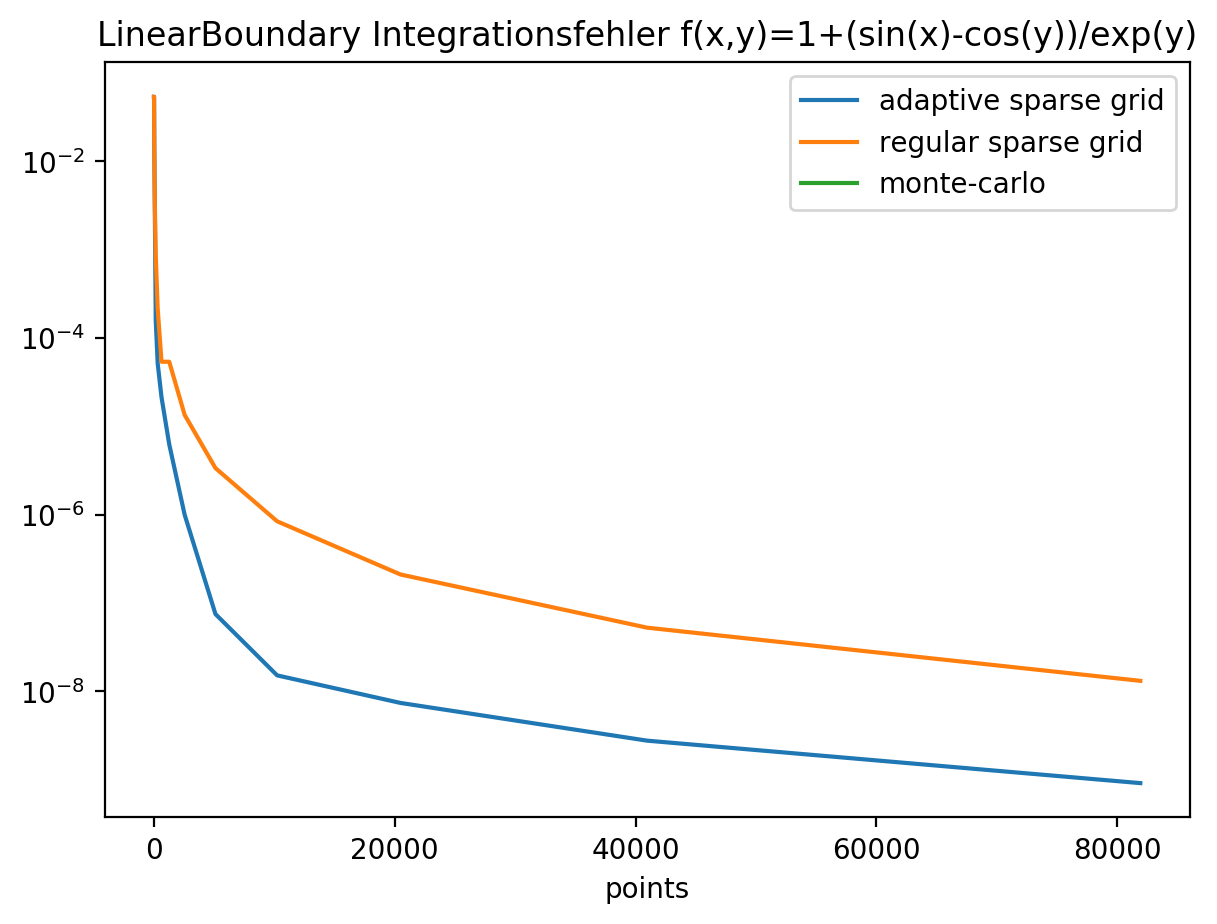

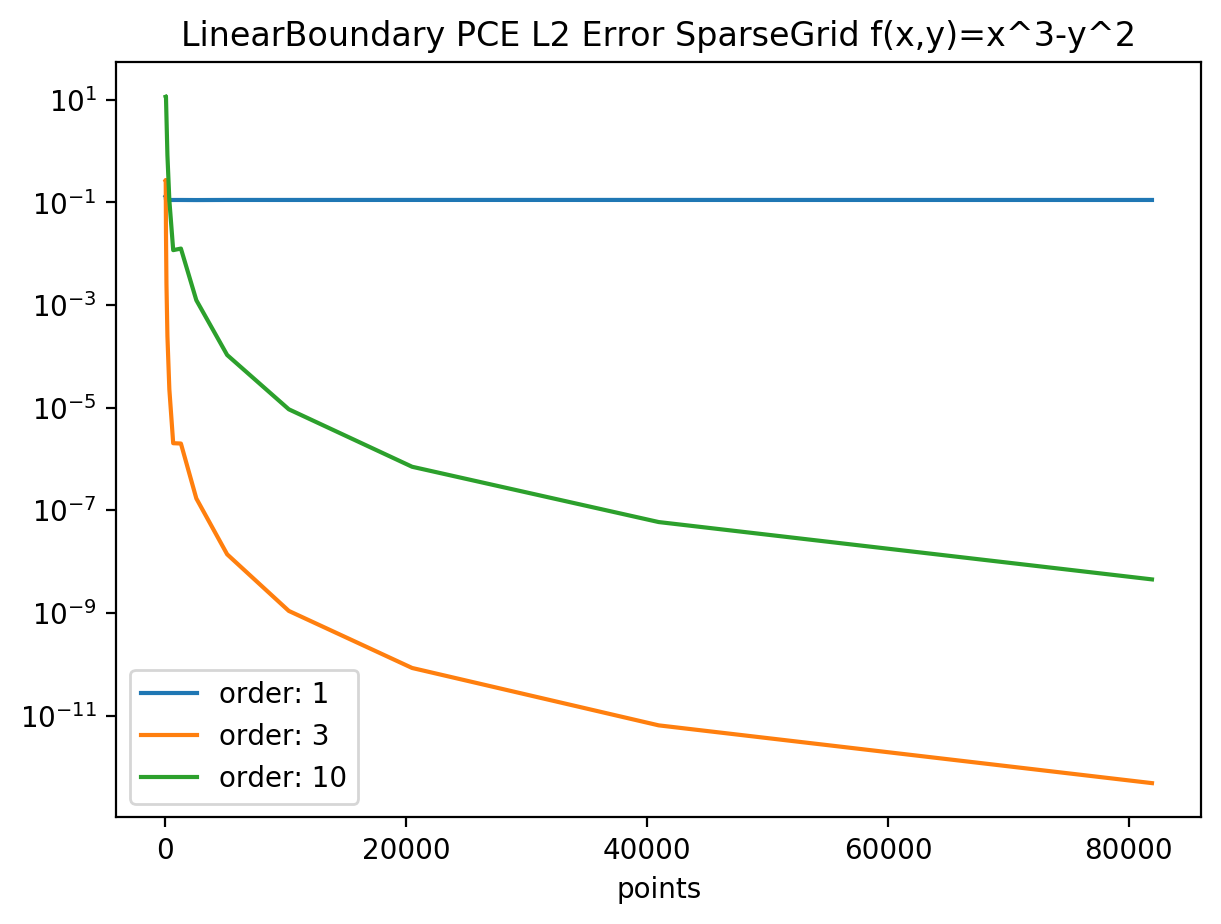

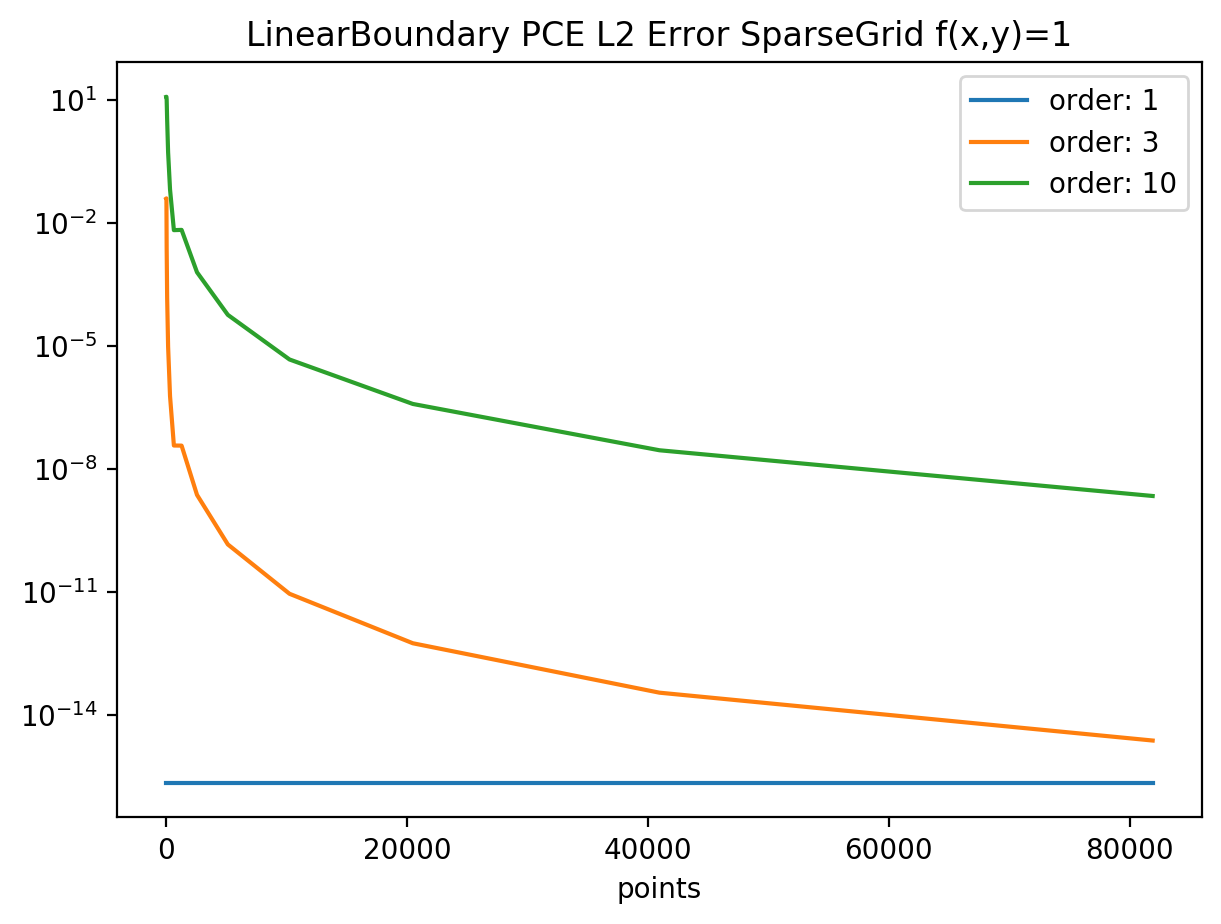

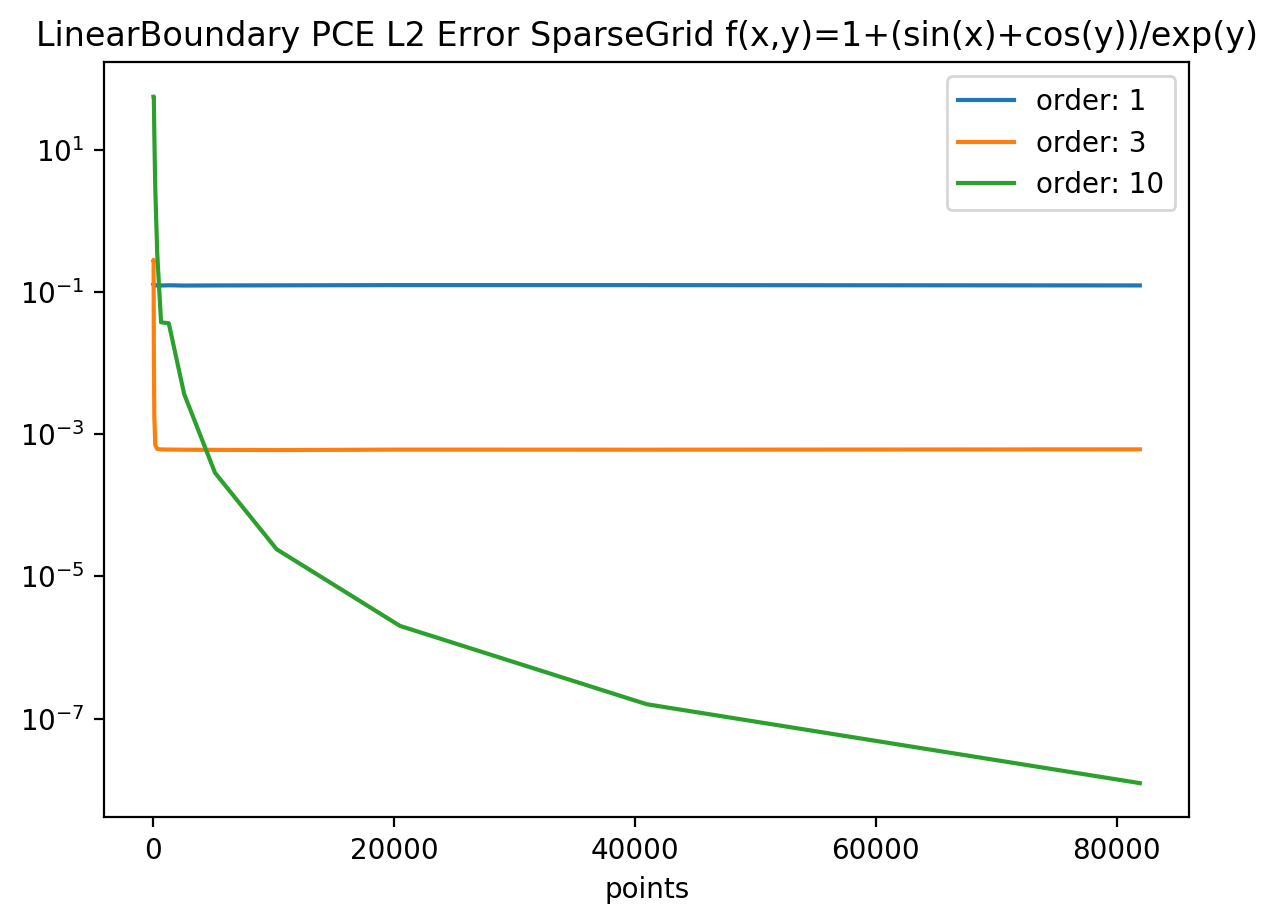

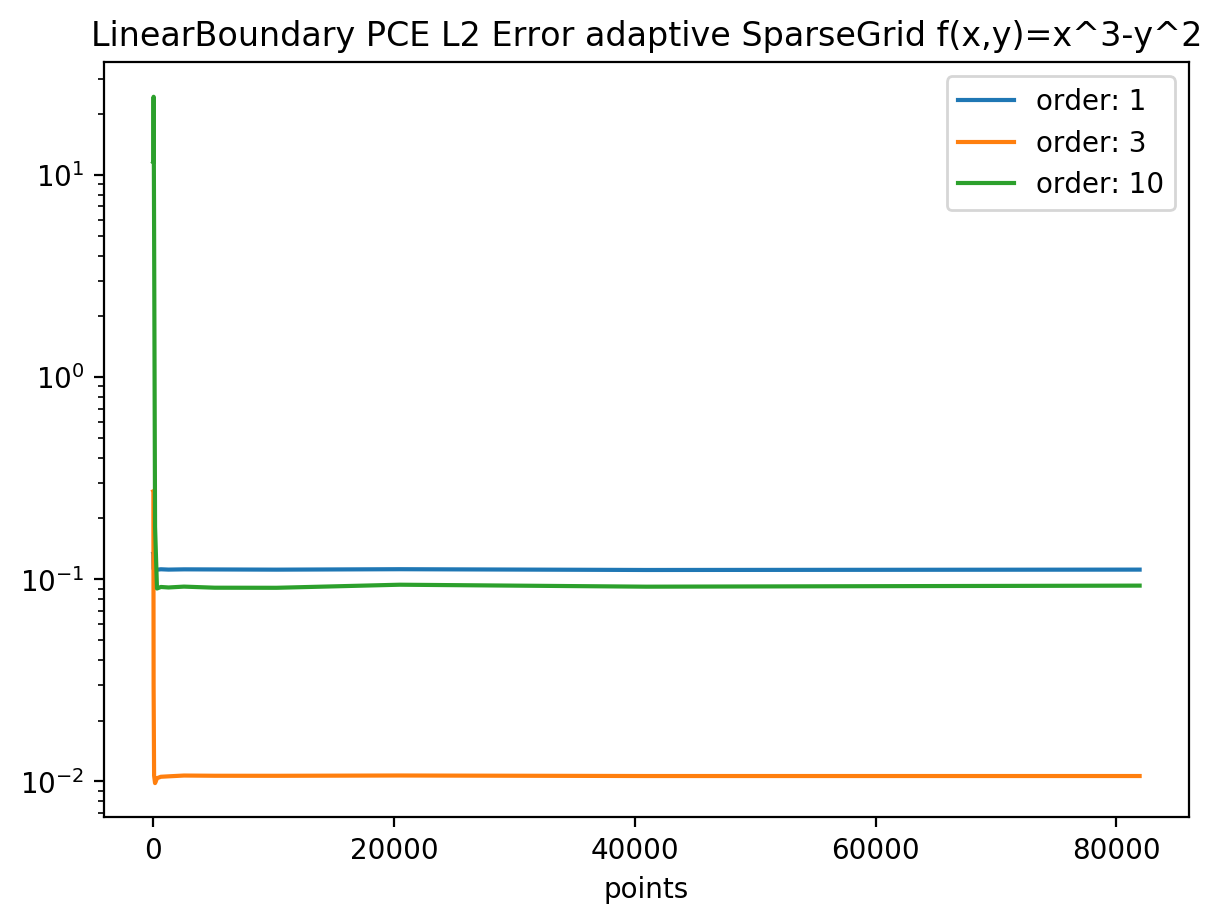

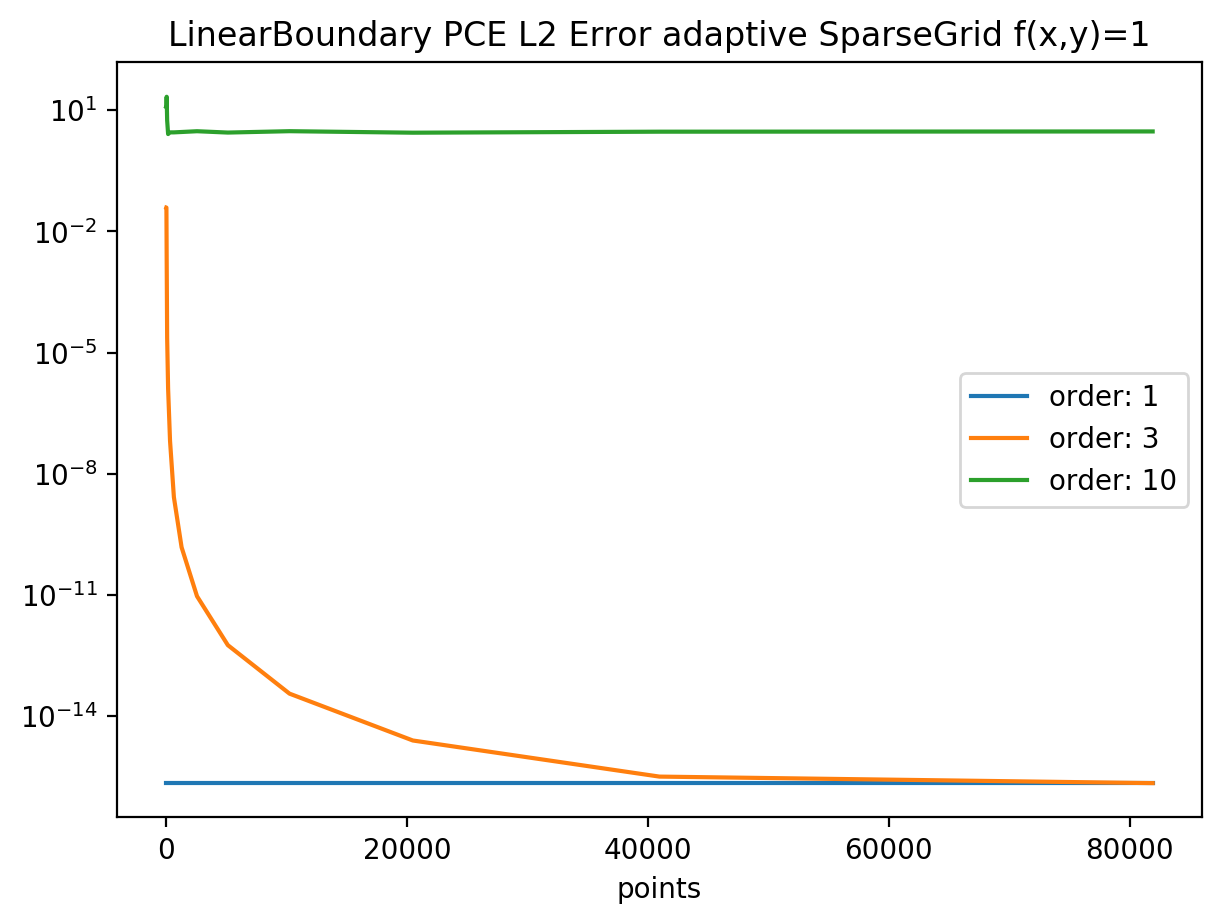

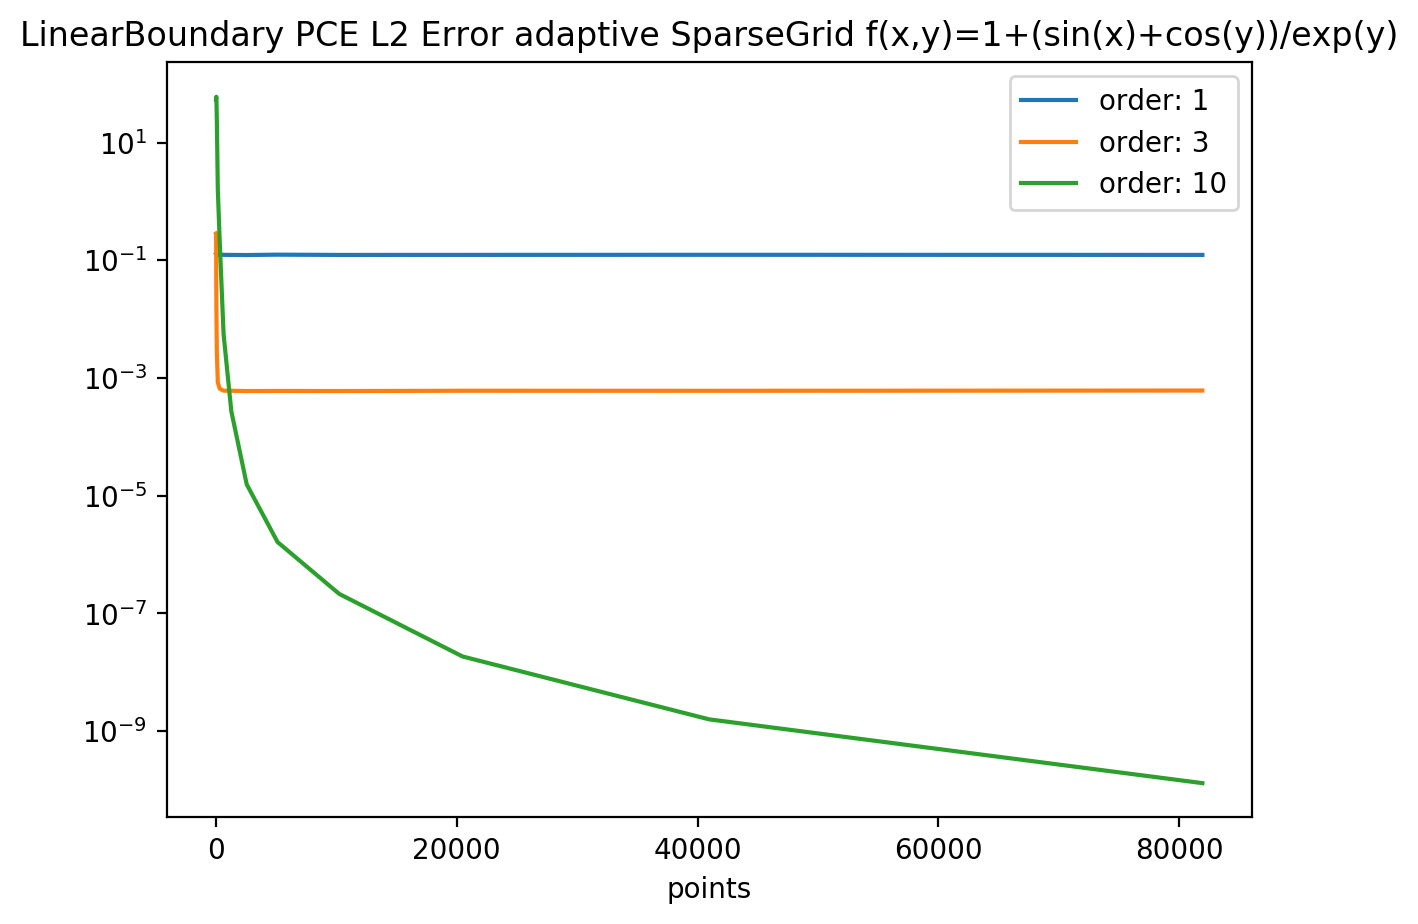

In [32]:
printer("LinearBoundary")

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+01,2.000000e+01,4.000000e+01,8.000000e+01,1.600000e+02,3.200000e+02,640.000000,1280.000000,2560.000000,5120,10240,NaN
1,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333,-1.333333,-1.333333,353313147248370164682356424704.0000000000000000,373554630270852823649102069760.0000000000000000,NaN
2,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.0000000000000000,4.0000000000000000,NaN
3,7.861380e+00,7.861380e+00,7.866506e+00,7.866836e+00,7.866842e+00,7.866843e+00,7.866843,7.866843,7.866843,7.8668429923871415,7.8668429924003869,NaN
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0403185203501333,0.0862605068367788,NaN
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000000000000000,0.0000000000000000,NaN
6,1.512309e-08,1.729524e-08,2.067857e-10,8.569000e-13,5.060000e-14,1.300000e-15,0.000000,0.000000,0.000000,0.0000000000000000,0.0000000000000000,NaN


TypeError: unsupported operand type(s) for -: 'str' and 'int'

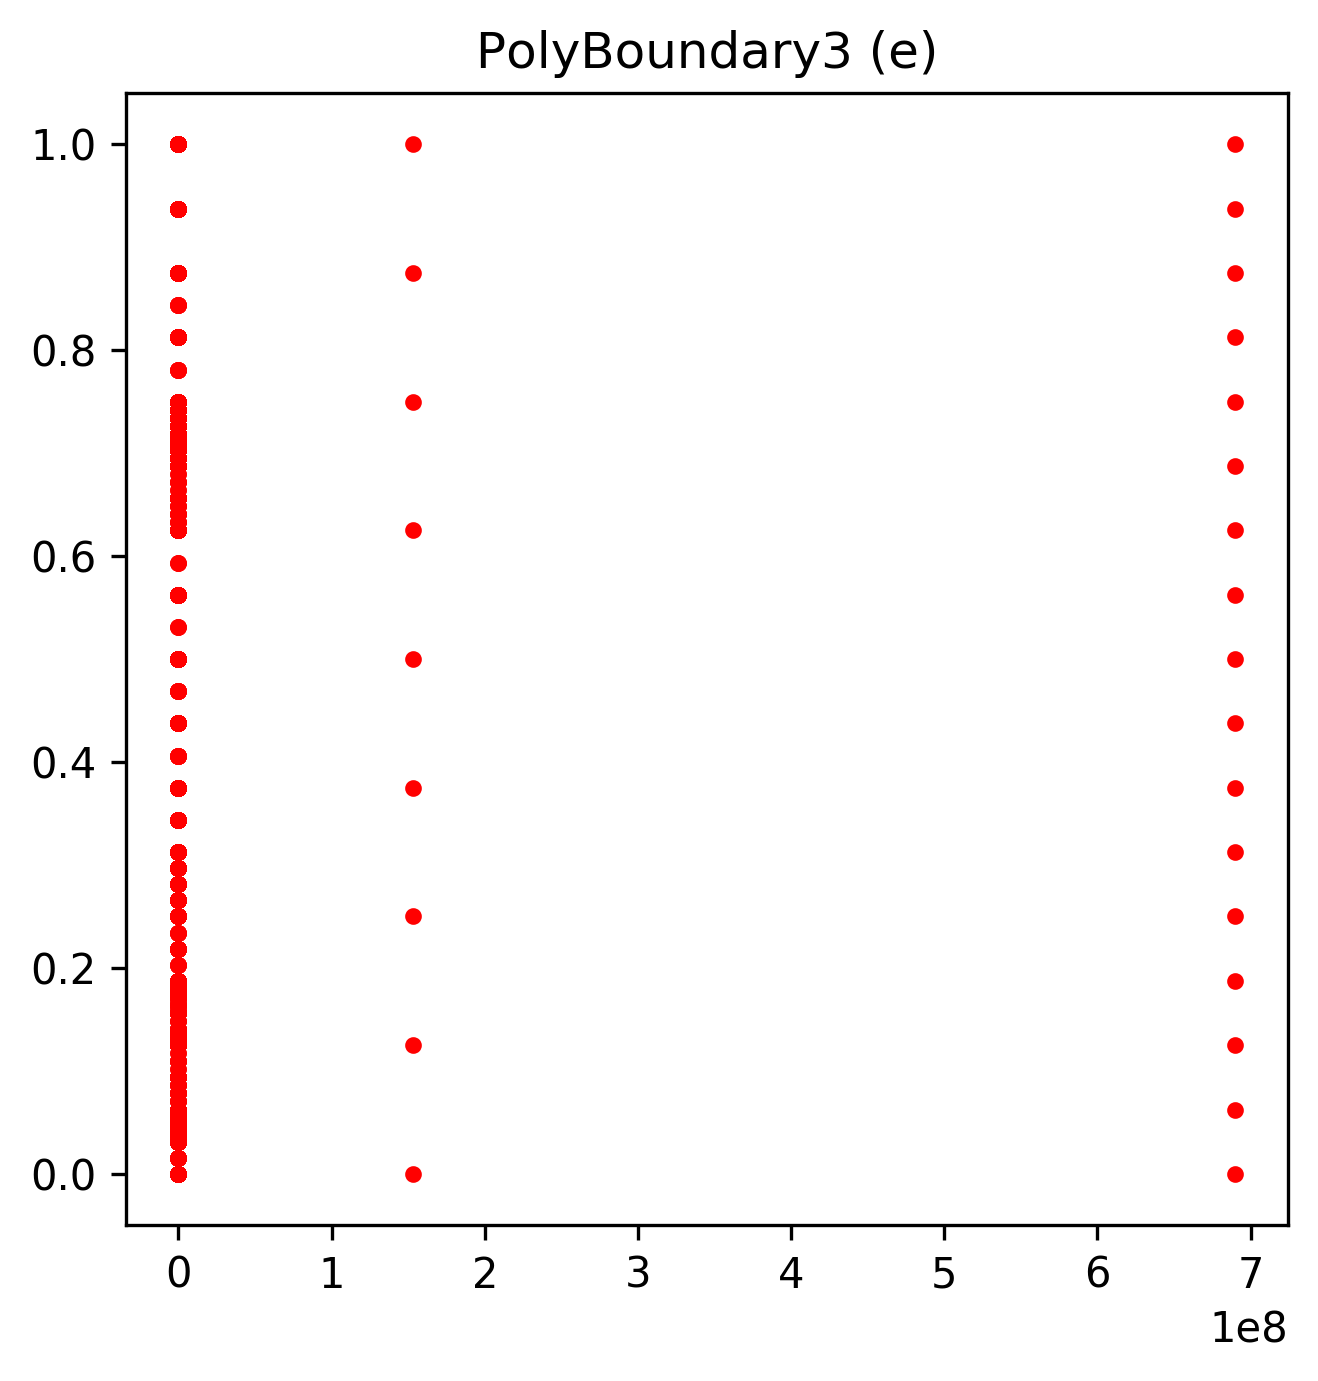

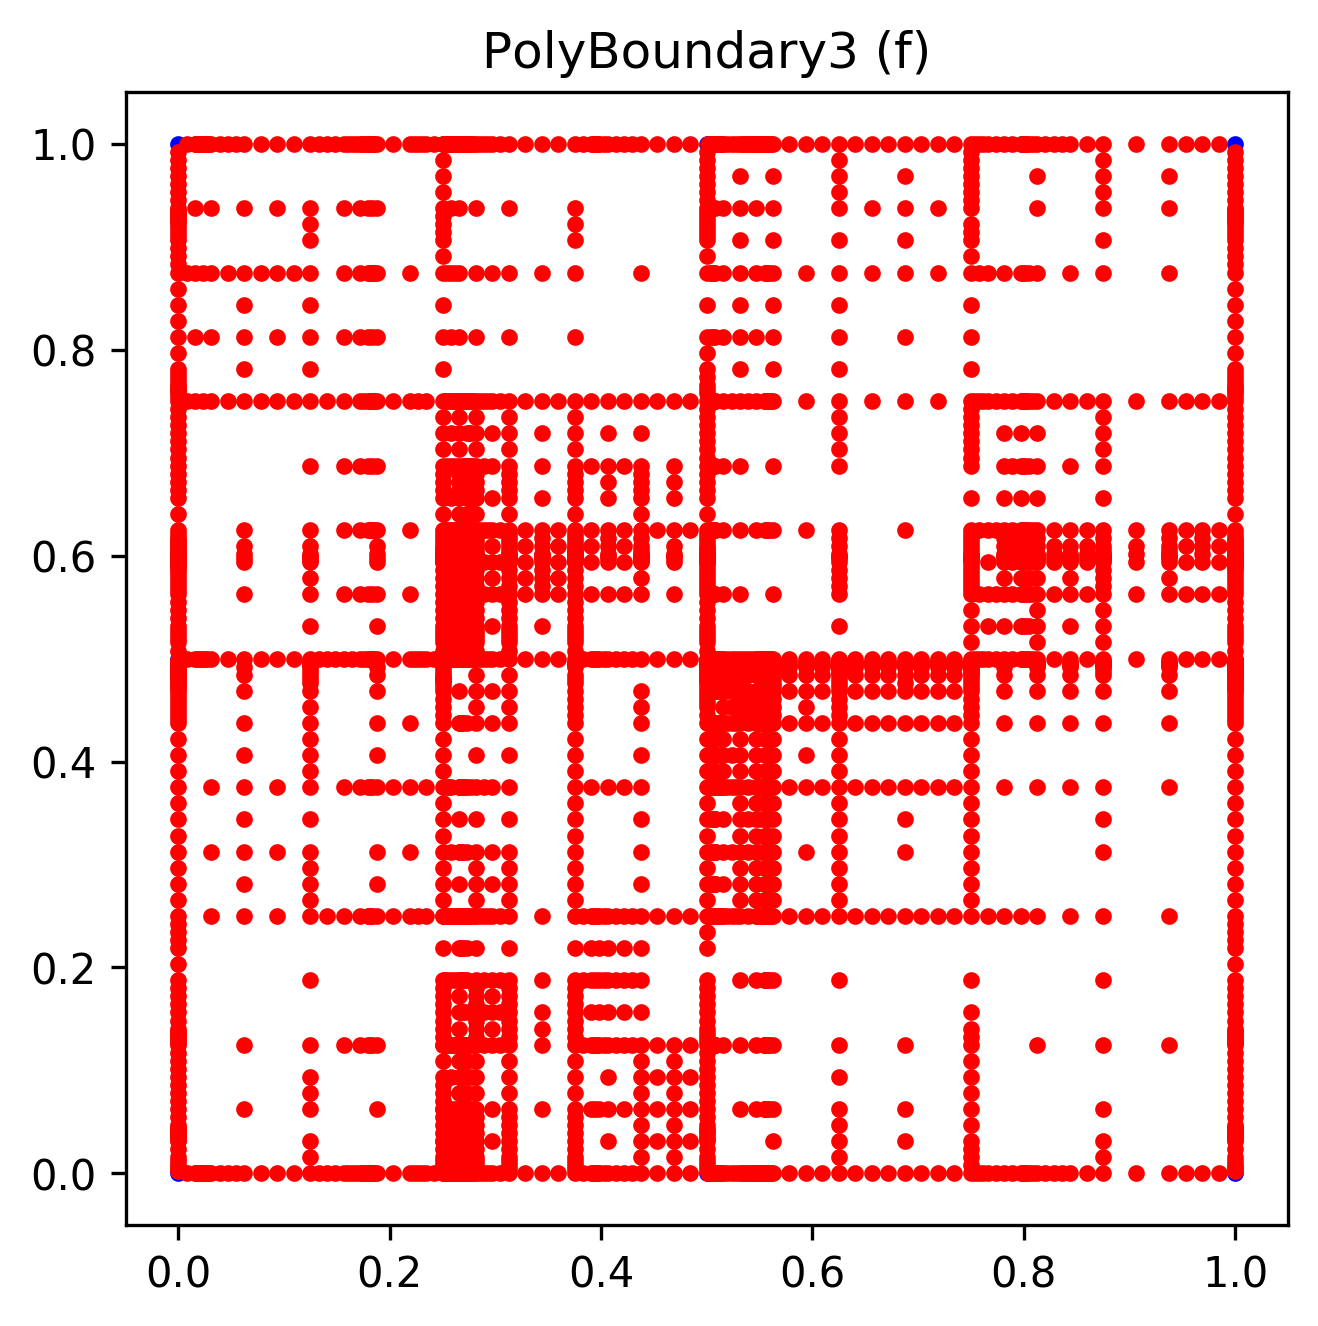

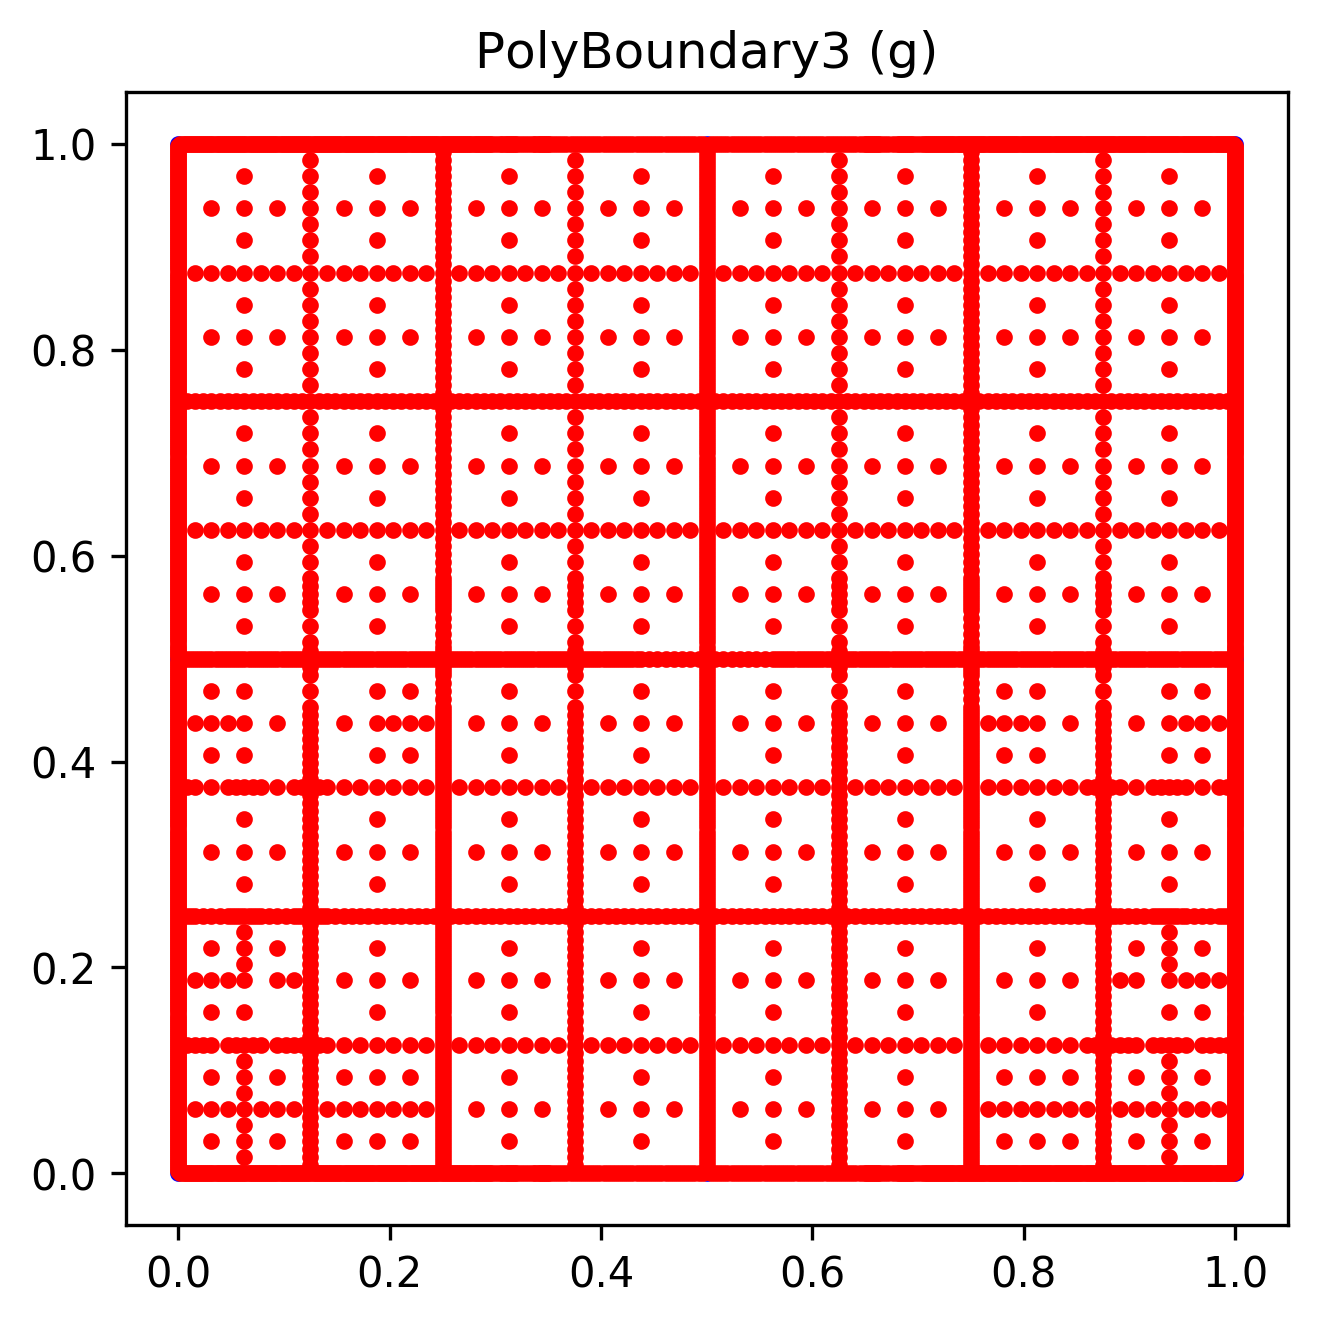

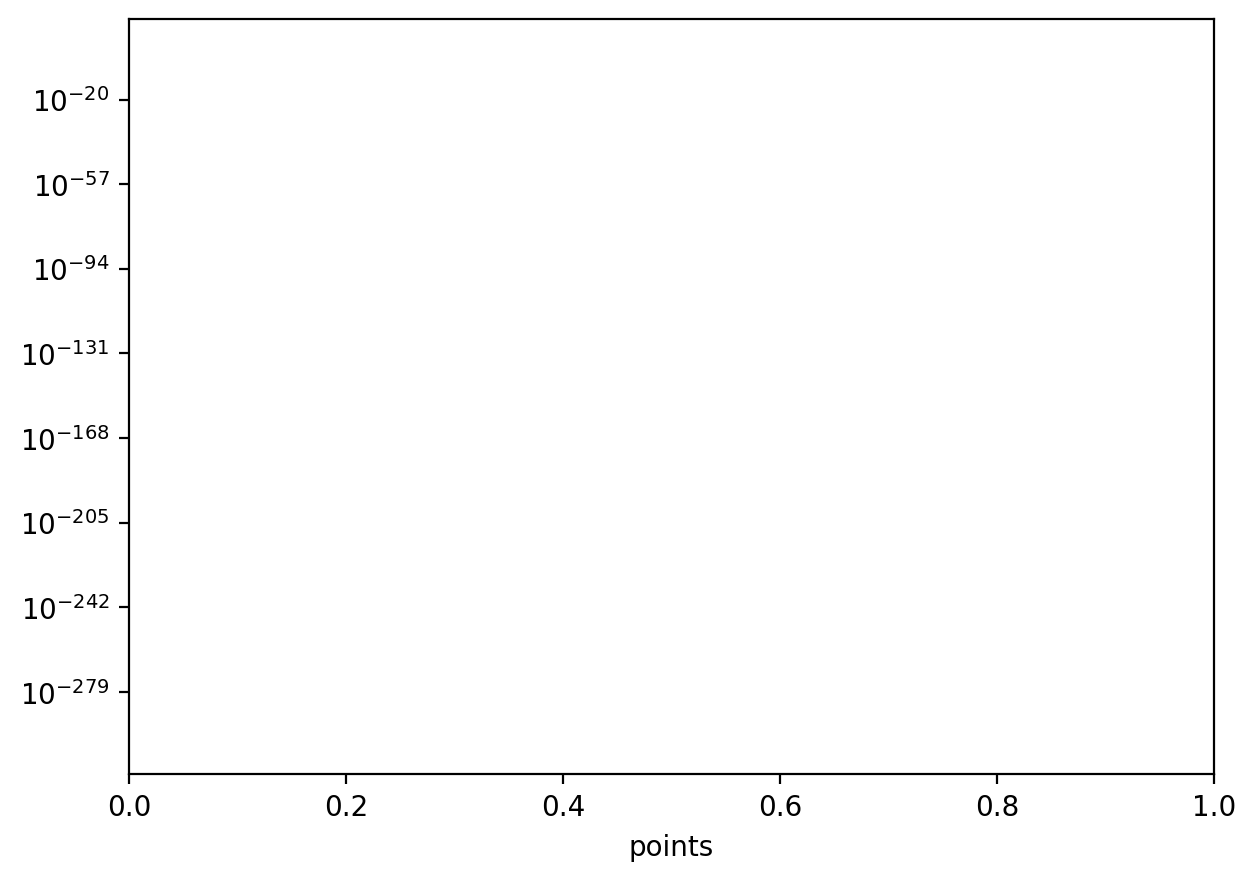

In [27]:
printer('PolyBoundary3')

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+01,2.000000e+01,4.000000e+01,8.000000e+01,1.600000e+02,320.000000,640.000000,1280.000000,2560.000000,NaN
1,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333,-1.333333,-1.333333,-1.333333,NaN
2,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,NaN
3,7.861380e+00,7.861380e+00,7.866707e+00,7.866879e+00,7.866846e+00,7.866843,7.866843,7.866843,7.866843,NaN
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
6,1.895079e-09,2.306252e-09,1.271070e-11,3.577000e-13,3.300000e-15,0.000000,0.000000,0.000000,0.000000,NaN


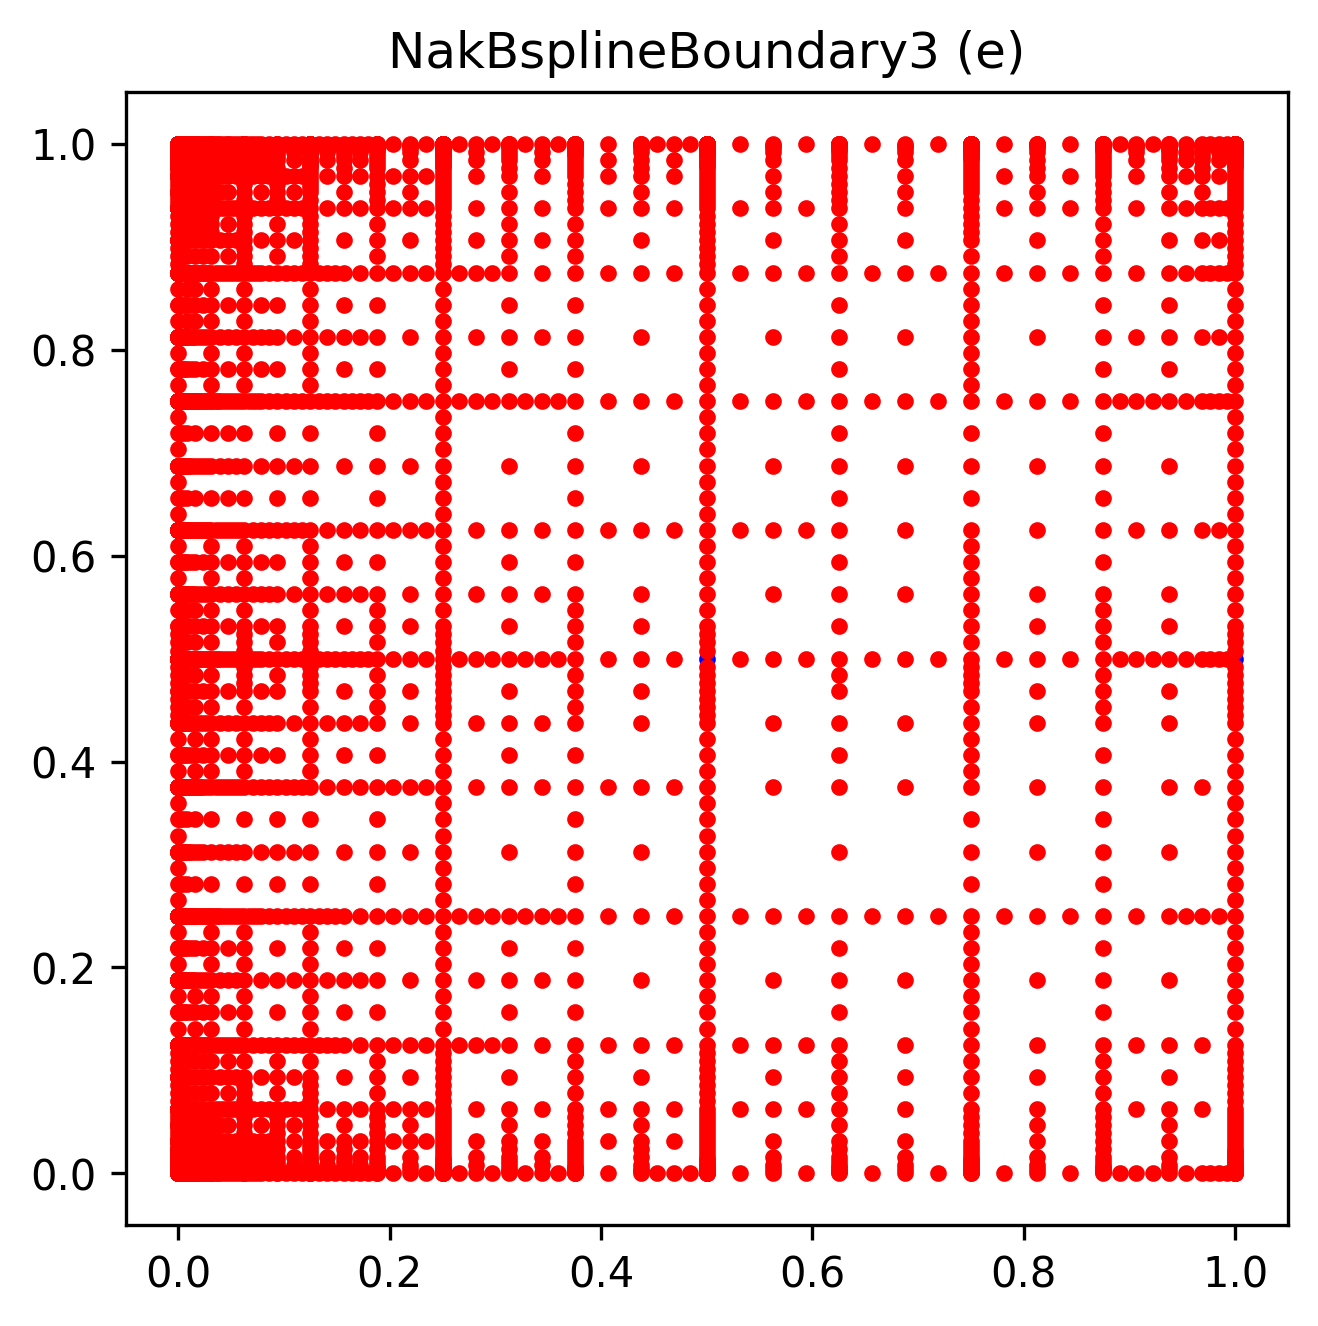

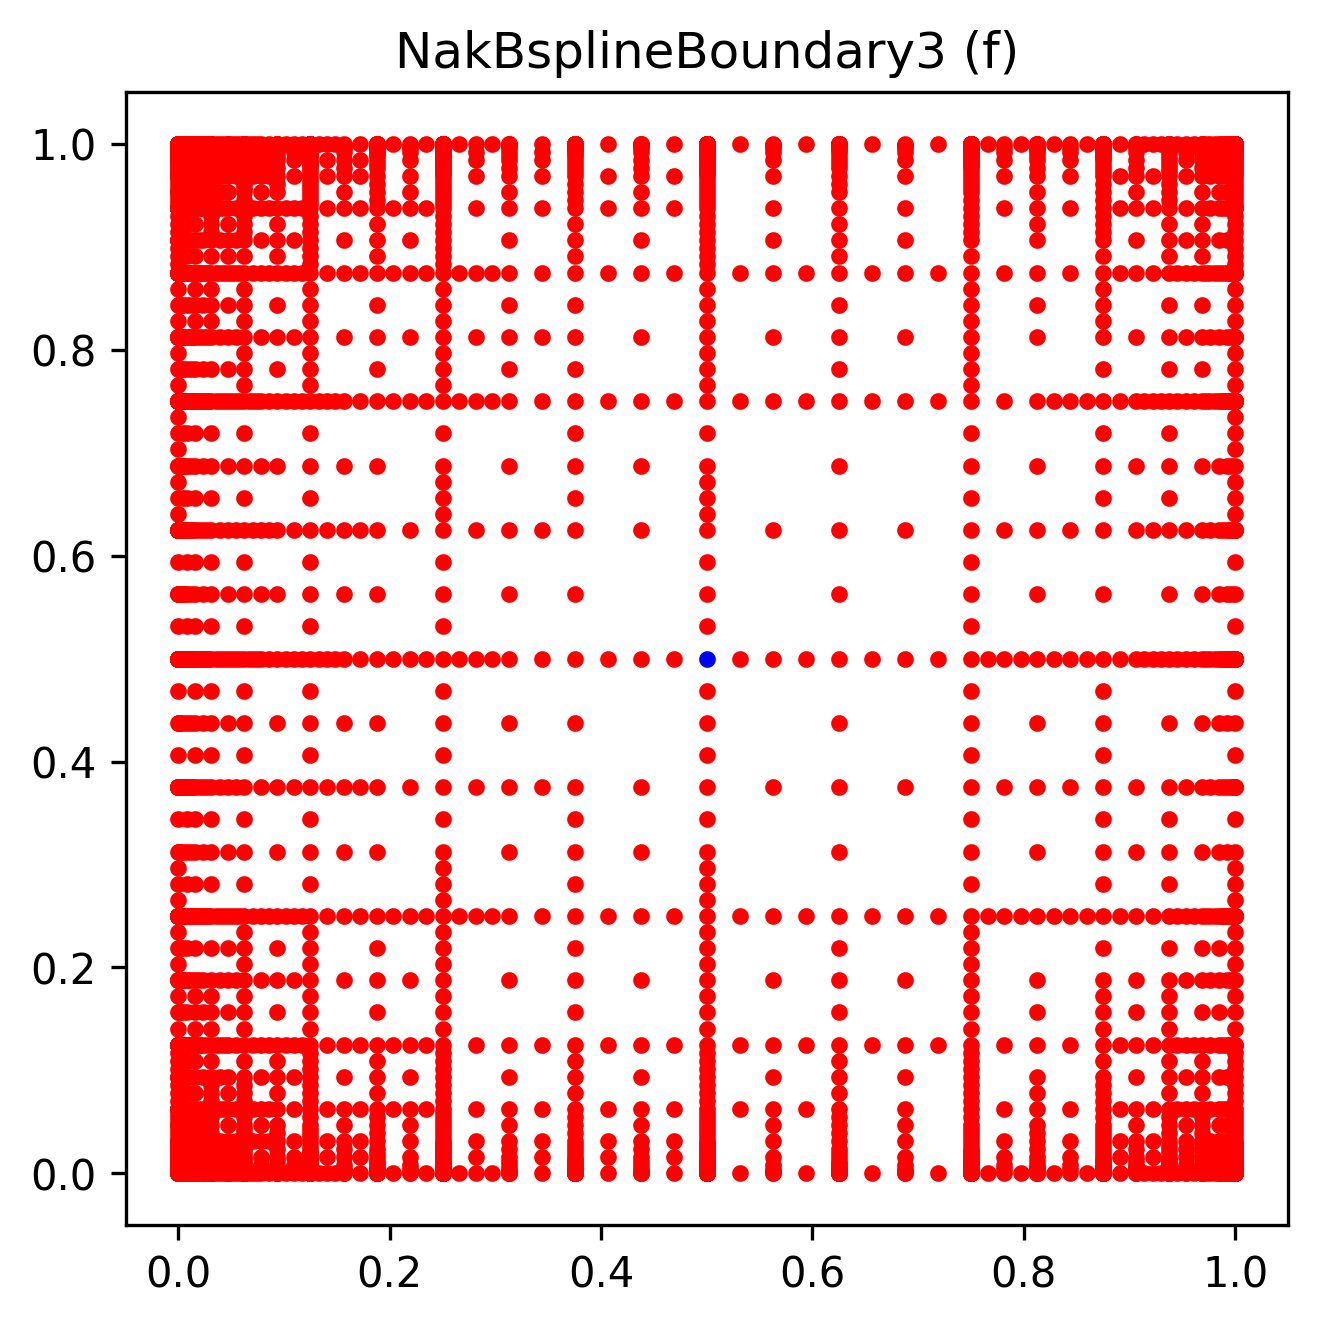

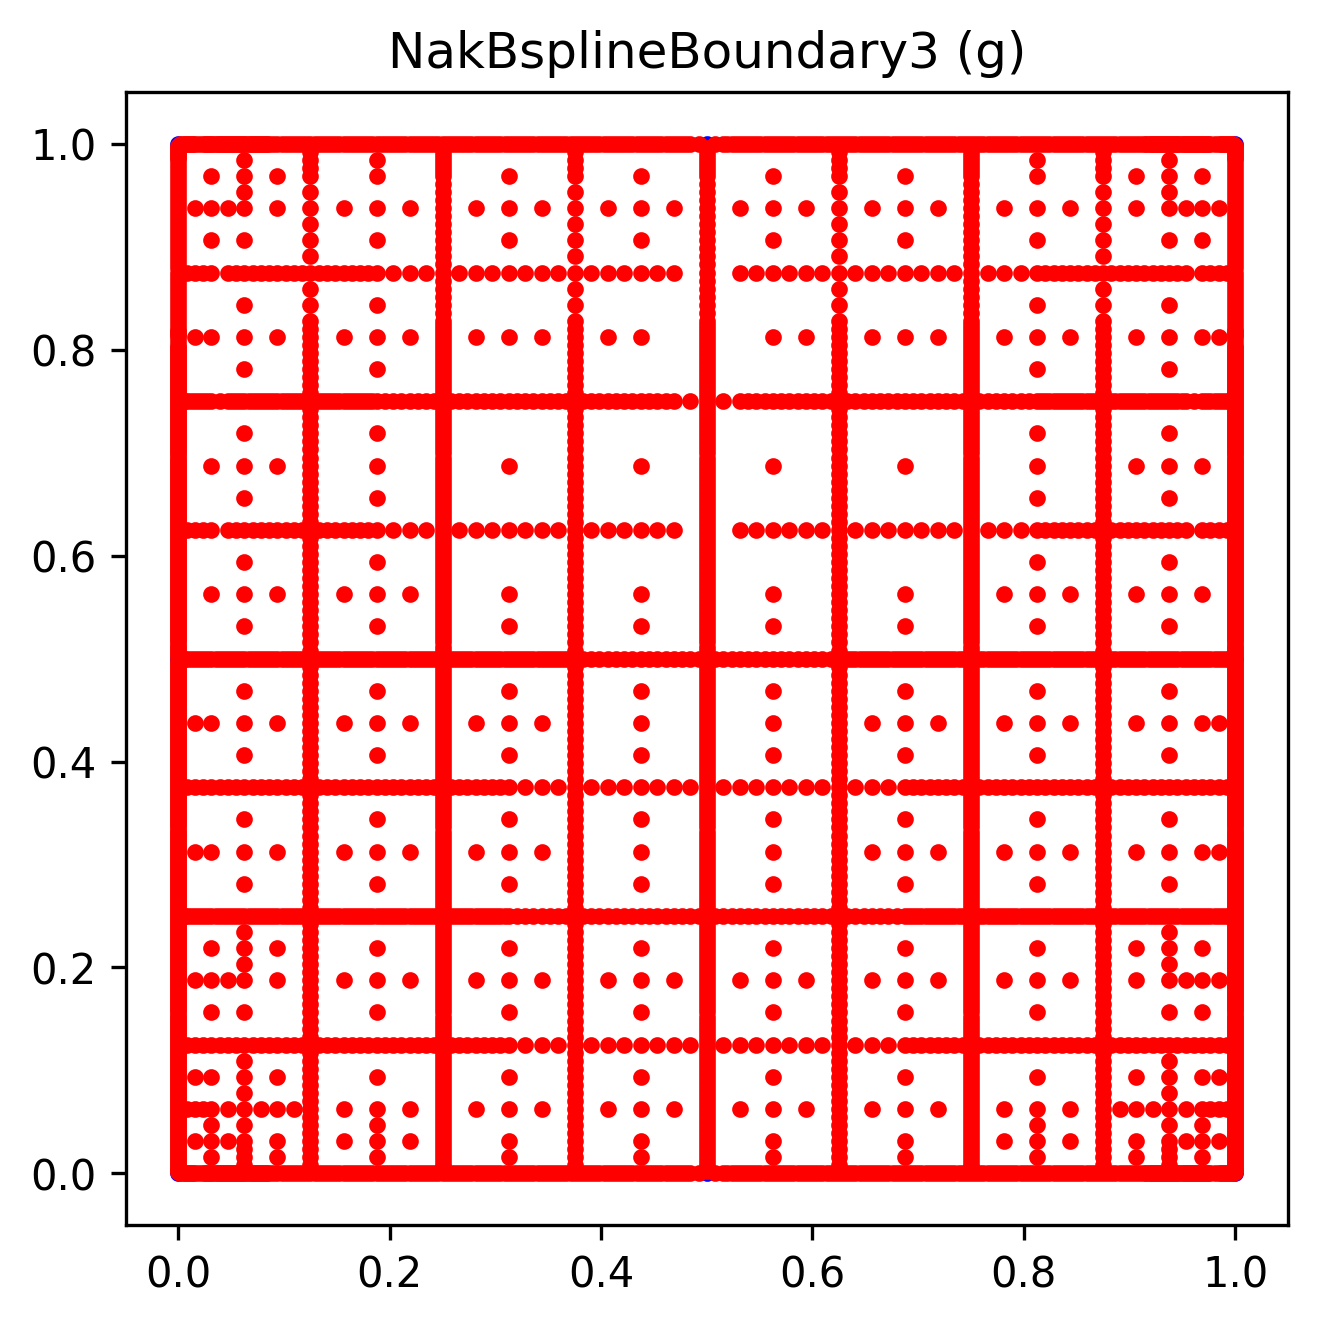

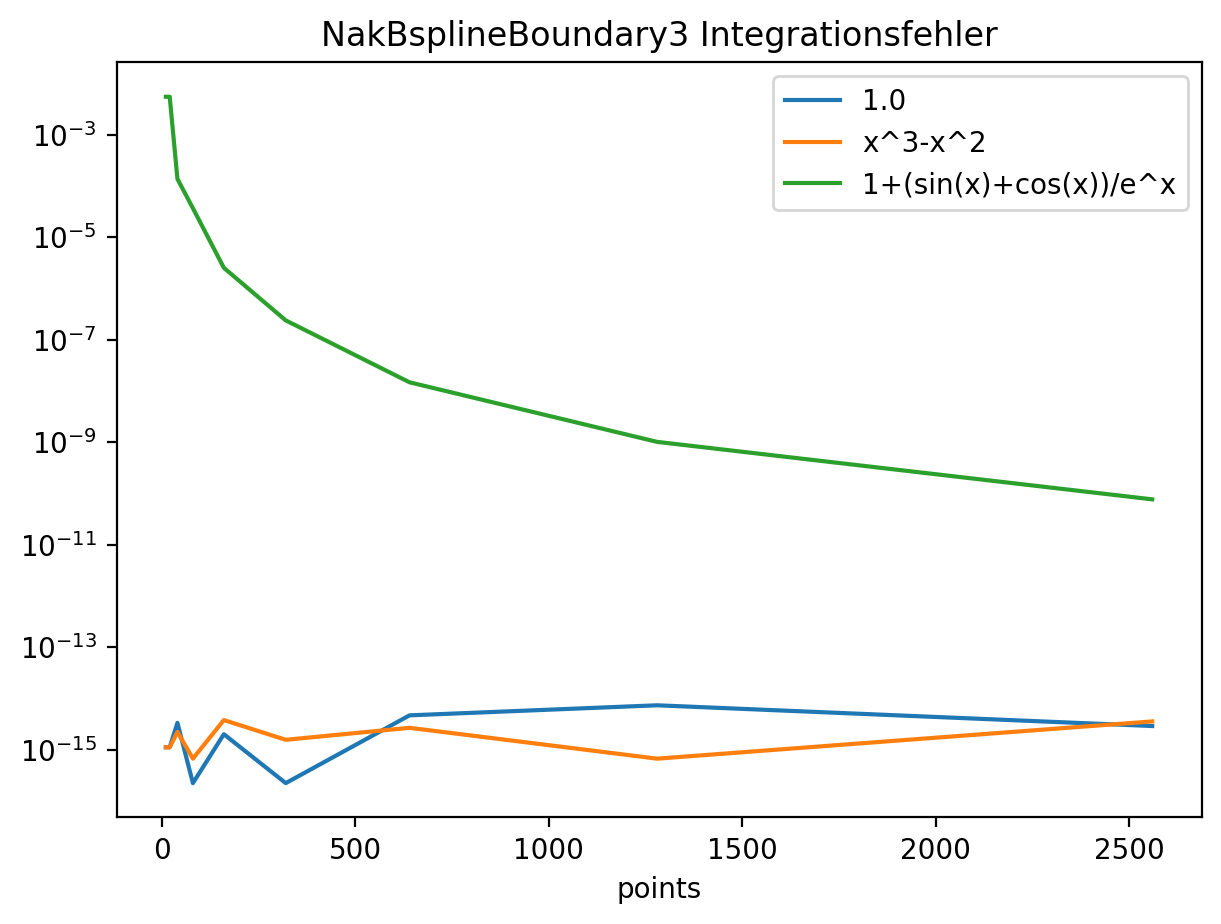

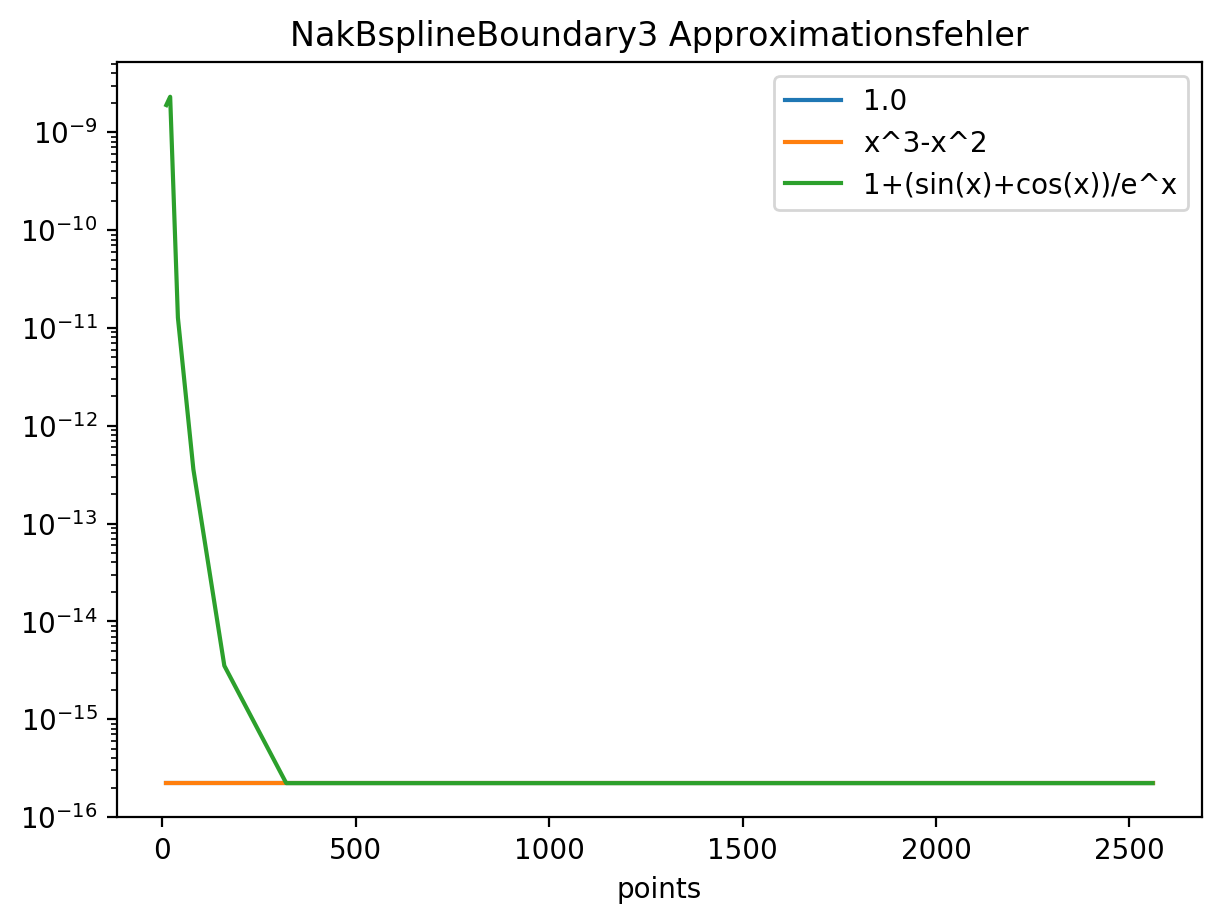

In [29]:
printer('NakBsplineBoundary3')